# Heart disease and it's severity


## Problem Description
To predict the heart disease with either of the levels None , MildClass1, MildClass2, Moderate,Severe.

### Anlaytics Objectives
The new information arising out of predicting the heart disease severity (None , MildClass1, MildClass2, Moderate, Severe) may help plan appropriate interventions to reverse and or control the disease and bring the affected person to normal conditions or reduce potential disability thereby saving insurance and social costs.

We are expected to create an analytical and modeling framework to predict the heart disease condition

### Data Set Description
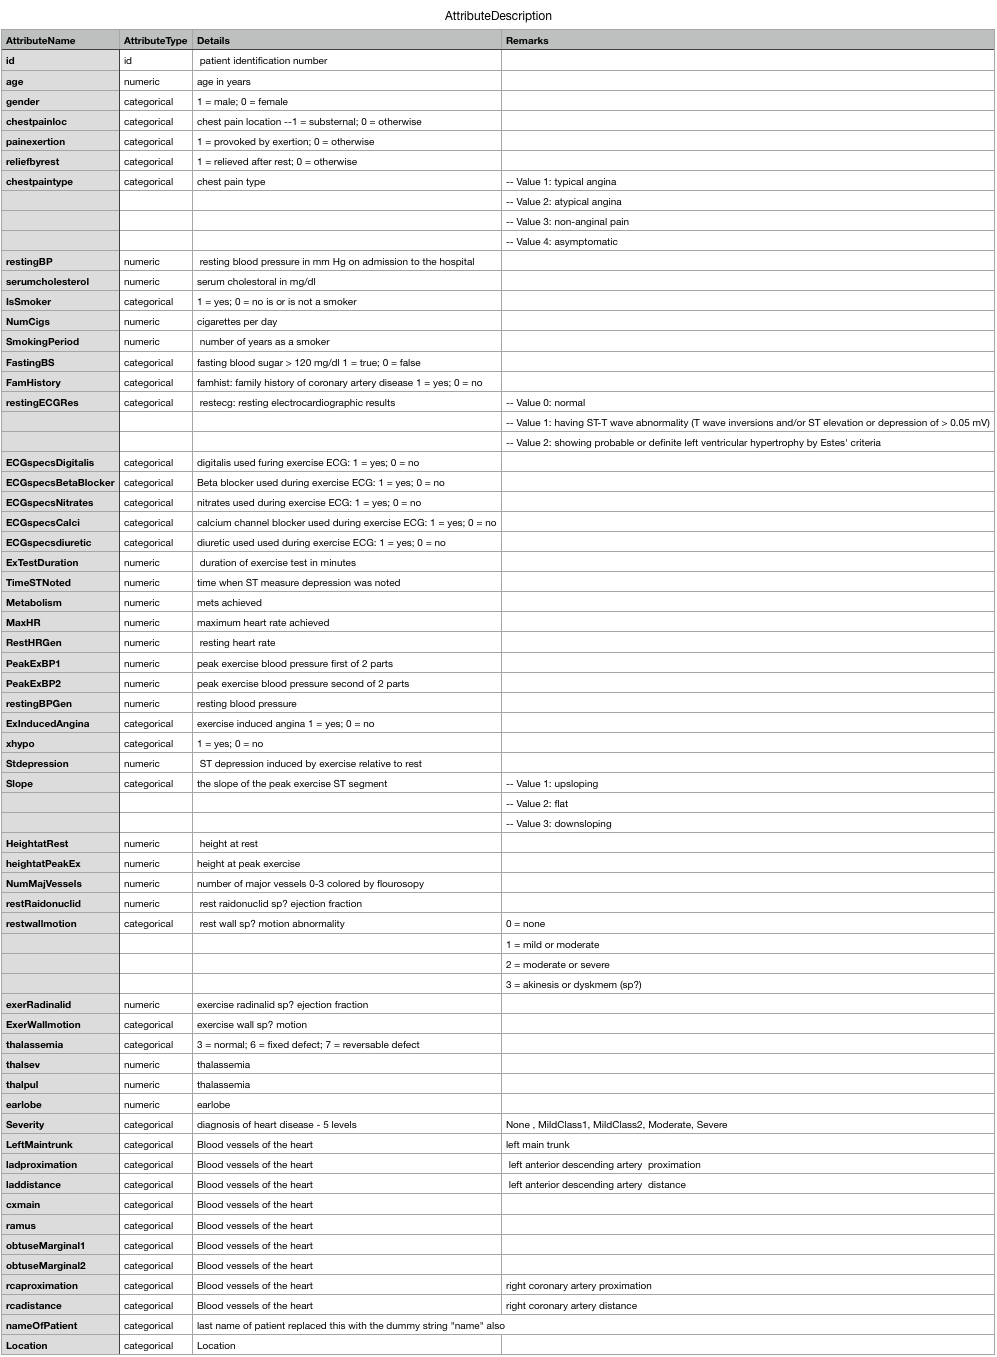

### Considerations / Assumptions
1. None

### Algorithm Class
Multi-Class Classification.

### Given constraints
1. Missing Values : Denoted as “”,”NA”,"-9".
2. Target attribute : "Severity"
3. Matrics of evaluation : Accuracy

### Main Tasks
1. Exploratory Data Analysis using visualizations in R Notebook or Jupiter notebook format ( Use only Train data for this task)
2. Based on domain and data understanding, which attributes do you intuitively think would impact the severity of the disease?
3. Learning curves :what is your observation based on the learning curves? Is there any bias or variance problem in the data or none?
4. Based on the learning curves observation, which model do you think is suitable for the data and why?
5. Using the ML methods, which attributes do you find as important and do you agree with the observations as per (2) in the Main Tasks? Explain.
6. You are expected to build a framework that predicts the heart disease severity (The target attribute “Severity”).
7. Viva

## Import libraries

In [1]:
from custom_python_package import data_insight as di
from custom_python_package import data_plot as dp
from custom_python_package import data_model as dm
from custom_python_package import data_model_alteration as dma
from custom_python_package import data_model_evaluation as dme


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt     


In [2]:
di.set_env_var()
di.set_seed(777)

## Import required data

In [3]:
heartDiseaseData=di.data_importer_csv("/Users/samyam/Documents/Samya/GIT/insofe/Template/Train.csv", ["NA", "","-9"])


The number of Rows in the Data set  = 674
The number of Columns in the data set = 55


## Feature Analysis

In [4]:
di.data_description(heartDiseaseData)

The columns in the data set are : 
 ['id', 'age', 'gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'restingBP', 'serumcholesterol', 'IsSmoker', 'NumCigs', 'SmokingPeriod', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'ExInducedAngina', 'xhypo', 'Stdepression', 'Slope', 'HeightatRest', 'heightatPeakEx', 'NumMajVessels', 'restRaidonuclid', 'restwallmotion', 'exerRadinalid', 'ExerWallmotion', 'thalassemia', 'thalsev', 'thalpul', 'earlobe', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance', 'nameOfPatient', 'Location', 'Severity']
The data types of the columns are :

 id                       int64
age                      int64
gender                   int64
chestpainl

__Check the first and last 5 rows in dataset to get an understanding of data__

In [5]:
heartDiseaseData.head()
heartDiseaseData.tail()

,id,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,exerRadinalid,ExerWallmotion,thalassemia,thalsev,thalpul,earlobe,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,nameOfPatient,Location,Severity
0,3172,37,1,1.0,0.0,0.0,3,118.0,240.0,0.0,NaN,19.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,13.0,165.0,63.0,168.0,88.0,72.0,0.0,0.0,1.0,2.0,25.0,22.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Va,None
1,4242,41,0,NaN,NaN,NaN,2,126.0,306.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,163.0,94.0,140.0,70.0,90.0,0.0,0.0,0.0,1.0,14.0,92.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,name,Cleveland,None
2,2247,54,1,0.0,0.0,0.0,1,120.0,171.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,7.0,137.0,68.0,182.0,110.0,82.0,0.0,0.0,2.0,1.0,24.0,23.0,1.0,1.0,0.0,1.0,NaN,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,name,Hungarian,Moderate
3,2072,44,1,1.0,0.0,0.0,2,130.0,215.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,3.0,135.0,82.0,180.0,115.0,100.0,0.0,0.0,0.0,2.0,15.0,15.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,name,Hungarian,None
4,2188,58,1,1.0,0.0,0.0,2,130.0,251.0,NaN,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,5.0,110.0,58.0,220.0,120.0,80.0,0.0,0.0,0.0,2.0,4.0,6.0,1.0,NaN,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Hungarian,MildClass2


,id,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,exerRadinalid,ExerWallmotion,thalassemia,thalsev,thalpul,earlobe,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,nameOfPatient,Location,Severity
669,5062,55,1,1.0,1.0,1.0,4,120.0,0.0,0.0,19.0,19.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,8.5,6.0,150.0,92.0,55.0,130.0,80.0,75.0,0.0,0.0,0.3,1.0,14.0,55.0,1.0,1.0,0.0,1.0,0.0,7.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,name,Switzerland,Severe
670,4189,54,1,1.0,NaN,1.0,2,192.0,283.0,1.0,35.0,25.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,10.0,10.0,11.0,195.0,92.0,192.0,90.0,100.0,0.0,0.0,0.0,1.0,14.0,120.0,1.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,name,Cleveland,MildClass1
671,2024,44,1,1.0,0.0,0.0,2,150.0,288.0,NaN,19.0,19.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,6.5,5.5,5.0,150.0,64.0,170.0,95.0,100.0,1.0,0.0,3.0,2.0,27.0,25.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,0.0,NaN,1.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,1.0,name,Hungarian,Moderate
672,3190,68,1,1.0,0.0,1.0,3,134.0,254.0,0.0,20.0,45.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,9.0,6.0,10.0,151.0,63.0,174.0,110.0,80.0,1.0,0.0,0.0,2.0,9.0,11.0,1.0,1.0,NaN,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Va,None
673,4130,62,0,NaN,1.0,NaN,4,124.0,209.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.1,3.0,8.0,163.0,72.0,154.0,80.0,78.0,0.0,0.0,0.0,1.0,14.0,96.0,0.0,1.0,0.0,1.0,0.0,3.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,name,Cleveland,None


__Random Sample rows__

In [6]:
di.get_data_sample(heartDiseaseData)

,id,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,exerRadinalid,ExerWallmotion,thalassemia,thalsev,thalpul,earlobe,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,nameOfPatient,Location,Severity
414,5060,56,1,1.0,0.0,0.0,4,120.0,0.0,1.0,20.0,19.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,9.0,7.5,150.0,100.0,60.0,140.0,70.0,80.0,1.0,0.0,-1.0,3.0,NaN,55.0,1.0,1.00,0.0,1.0,NaN,7.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,name,Switzerland,MildClass2
494,4175,64,1,1.0,1.0,NaN,4,145.0,212.0,1.0,25.0,10.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,4.5,3.0,6.0,132.0,64.0,180.0,90.0,90.0,0.0,0.0,2.0,2.0,14.0,178.0,2.0,1.00,0.0,1.0,0.0,6.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,name,Cleveland,Severe
583,2293,47,0,0.0,0.0,0.0,2,140.0,257.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.5,4.0,135.0,84.0,150.0,90.0,90.0,0.0,0.0,1.0,1.0,14.0,13.0,1.0,NaN,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,name,Hungarian,None
194,4276,64,1,1.0,1.0,1.0,1,170.0,227.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,10.0,155.0,84.0,232.0,120.0,90.0,0.0,0.0,0.6,2.0,14.0,100.0,0.0,1.00,0.0,1.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,name,Cleveland,None
66,5046,63,1,1.0,1.0,1.0,4,140.0,0.0,1.0,19.0,19.0,NaN,NaN,2.0,0.0,1.0,0.0,1.0,0.0,9.0,12.0,NaN,149.0,70.0,200.0,100.0,90.0,0.0,0.0,2.0,1.0,11.0,6.0,1.0,1.00,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,name,Switzerland,MildClass2
483,5011,62,0,1.0,1.0,1.0,4,120.0,0.0,1.0,19.0,19.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,6.0,0.0,NaN,123.0,70.0,175.0,105.0,80.0,1.0,0.0,1.7,3.0,8.0,7.0,1.0,1.00,0.0,1.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Switzerland,MildClass1
92,2260,51,0,1.0,0.0,0.0,3,150.0,200.0,NaN,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,8.0,5.0,120.0,80.0,200.0,110.0,100.0,0.0,0.0,0.5,1.0,12.0,14.0,1.0,1.00,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,name,Hungarian,None
63,3152,71,1,1.0,1.0,1.0,4,130.0,221.0,1.0,60.0,50.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,NaN,5.0,115.0,72.0,160.0,100.0,80.0,1.0,0.0,0.0,2.0,11.0,10.0,1.0,0.48,2.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,name,Va,Moderate
233,3165,51,1,0.0,1.0,1.0,4,NaN,NaN,1.0,20.0,35.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14.0,55.0,NaN,0.56,0.0,1.0,NaN,7.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,name,Va,MildClass1
230,2021,43,0,0.0,0.0,0.0,1,100.0,223.0,1.0,19.0,19.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0,142.0,82.0,145.0,80.0,60.0,0.0,0.0,0.0,NaN,10.0,10.0,1.0,1.00,0.0,1.0,NaN,3.0,1.0,NaN,0.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,name,Hungarian,MildClass2


__Distribution of target attribute__

None          228
Moderate      147
MildClass1    136
MildClass2    118
Severe         45
Name: Severity, dtype: int64
None          33.827893
Moderate      21.810089
MildClass1    20.178042
MildClass2    17.507418
Severe         6.676558
Name: Severity, dtype: float64


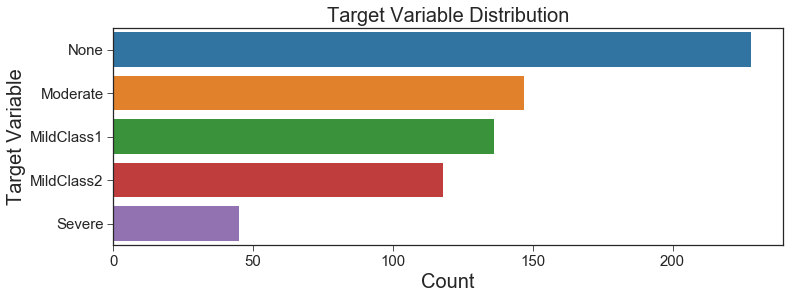

In [7]:
dp.plot_data_dist_across_targ(heartDiseaseData, "Severity")

__Observations__

1. Severity attribute is not having huge class imbalance.


__Check count of null in each column & its percent__

In [8]:
di.get_null_count_per_attribute(heartDiseaseData)

,total_missing,perc_missing
ExerWallmotion,139,20.623145
restwallmotion,122,18.100890
IsSmoker,101,14.985163
obtuseMarginal2,88,13.056380
ramus,87,12.908012
Metabolism,80,11.869436
thalassemia,76,11.275964
ECGspecsdiuretic,62,9.198813
FastingBS,62,9.198813
FamHistory,60,8.902077


__Observations__

1. No missing values in target


__Check for monotonically increasing columns__

In [9]:
di.get_monotonically_incleasing_attributes(heartDiseaseData)

Column : nameOfPatient : is Monotonically increasing


__Check for count of unique values in different attriutes__

In [10]:
heartDiseaseData_unique_perc = di.get_unique_value_count_per_attribute(heartDiseaseData)
heartDiseaseData_unique_perc

,perc_unique
nameOfPatient,0.148368
earlobe,0.148368
ExerWallmotion,0.148368
ECGspecsdiuretic,0.296736
thalpul,0.296736
xhypo,0.296736
ExInducedAngina,0.296736
ladproximation,0.296736
laddistance,0.296736
cxmain,0.296736


__Get Unique values and count of columns having less unique values__

This is understand if this is due to screwness of data?

In [11]:
di.get_frequency_of_attr_value(heartDiseaseData[heartDiseaseData_unique_perc[
    heartDiseaseData_unique_perc['perc_unique']<1].reset_index()['index']])


,nameOfPatient,earlobe,ExerWallmotion,chestpainloc,painexertion,gender,reliefbyrest,rcadistance,rcaproximation,IsSmoker,exerRadinalid,obtuseMarginal2,FamHistory,ECGspecsBetaBlocker,FastingBS,ECGspecsNitrates,ECGspecsdiuretic,ECGspecsDigitalis,xhypo,ExInducedAngina,ladproximation,thalpul,cxmain,ramus,obtuseMarginal1,ECGspecsCalci,laddistance,restingECGRes,restwallmotion,Slope,chestpaintype,LeftMaintrunk,Location,thalsev,Severity,NumMajVessels
name,674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0,NaN,638.0,535.0,31.0,179.0,145.0,138.0,NaN,NaN,85.0,NaN,NaN,157.0,455.0,509.0,451.0,549.0,604.0,614.0,386.0,NaN,631.0,NaN,NaN,NaN,512.0,NaN,412.0,542.0,1.0,NaN,1.0,NaN,24.0,NaN,134.0
1.0,NaN,NaN,NaN,597.0,452.0,529.0,498.0,553.0,471.0,488.0,640.0,570.0,457.0,168.0,103.0,173.0,63.0,18.0,15.0,245.0,472.0,11.0,492.0,559.0,549.0,113.0,514.0,121.0,3.0,153.0,32.0,593.0,NaN,573.0,NaN,476.0
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,166.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,NaN,146.0,28.0,88.0,NaN,123.0,140.0,6.0,432.0,120.0,35.0,NaN,38.0,NaN,29.0
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,48.0,159.0,NaN,NaN,9.0,NaN,14.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0,NaN,NaN,NaN,NaN,NaN
162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Hungarian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.0,NaN,NaN,NaN
Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN


__Drop attributes that are monotonically increasing or having many nulls or that doesn't have significance to analysis__

__Observations__

1. Drop id column.
2. Attribute ExerWallmotion has 20% missing values, but dont drop in first go, try to impute.
3. Attribute nameOfPatient should not have any effect on if the person has disease or not, so drop it.
4. Attribute ExerWallmotion, nameOfPatient, earlobe only has one value & NA's so can be dropped.
5. Attribute exerRadinalid has only two distinct values, of which only 1 value occurs only ONCE, can be dropped in second cut. Don't drop now.


In [12]:
heartDiseaseData_dropped_attr = heartDiseaseData.drop(['id', 'ExerWallmotion', 'nameOfPatient', 'earlobe'], axis=1)
heartDiseaseData_dropped_attr.head()


,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,exerRadinalid,thalassemia,thalsev,thalpul,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,Severity
0,37,1,1.0,0.0,0.0,3,118.0,240.0,0.0,NaN,19.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,13.0,165.0,63.0,168.0,88.0,72.0,0.0,0.0,1.0,2.0,25.0,22.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Va,None
1,41,0,NaN,NaN,NaN,2,126.0,306.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,163.0,94.0,140.0,70.0,90.0,0.0,0.0,0.0,1.0,14.0,92.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,Cleveland,None
2,54,1,0.0,0.0,0.0,1,120.0,171.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,7.0,137.0,68.0,182.0,110.0,82.0,0.0,0.0,2.0,1.0,24.0,23.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,Moderate
3,44,1,1.0,0.0,0.0,2,130.0,215.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,3.0,135.0,82.0,180.0,115.0,100.0,0.0,0.0,0.0,2.0,15.0,15.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,None
4,58,1,1.0,0.0,0.0,2,130.0,251.0,NaN,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,5.0,110.0,58.0,220.0,120.0,80.0,0.0,0.0,0.0,2.0,4.0,6.0,1.0,NaN,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,MildClass2


__DataType Conversions__

__Observations__

1. Categorical datatype: 
    
gender
chestpainloc
painexertion
reliefbyrest
chestpaintype
IsSmoker
FastingBS
FamHistory
restingECGRes
ECGspecsDigitalis
ECGspecsBetaBlocker
ECGspecsNitrates
ECGspecsCalci
ECGspecsdiuretic
ExInducedAngina
xhypo
Slope
restwallmotion
ExerWallmotion
thalassemia
Severity
LeftMaintrunk
ladproximation
laddistance
cxmain
ramus
obtuseMarginal1
obtuseMarginal2
rcaproximation
rcadistance
nameOfPatient
Location


2. Numberic datatype:

age
restingBP
serumcholesterol
NumCigs
SmokingPeriod
ExTestDuration
TimeSTNoted
Metabolism
MaxHR
RestHRGen
PeakExBP1
PeakExBP2
restingBPGen
Stdepression
HeightatRest
heightatPeakEx
NumMajVessels
restRaidonuclid
exerRadinalid
thalsev
thalpul
earlobe

3. Datatype conversions required.

In [13]:
cat_col = ['gender','chestpainloc','painexertion','reliefbyrest','chestpaintype','IsSmoker','FastingBS',
           'FamHistory','restingECGRes','ECGspecsDigitalis','ECGspecsBetaBlocker','ECGspecsNitrates',
           'ECGspecsCalci','ECGspecsdiuretic','ExInducedAngina','xhypo','Slope','restwallmotion',
           'thalassemia','Severity','LeftMaintrunk','ladproximation','laddistance',
           'cxmain','ramus','obtuseMarginal1','obtuseMarginal2','rcaproximation','rcadistance','Location']
num_col = np.setdiff1d(heartDiseaseData_dropped_attr.columns, cat_col).tolist()

cat_col
num_col


['gender',
 'chestpainloc',
 'painexertion',
 'reliefbyrest',
 'chestpaintype',
 'IsSmoker',
 'FastingBS',
 'FamHistory',
 'restingECGRes',
 'ECGspecsDigitalis',
 'ECGspecsBetaBlocker',
 'ECGspecsNitrates',
 'ECGspecsCalci',
 'ECGspecsdiuretic',
 'ExInducedAngina',
 'xhypo',
 'Slope',
 'restwallmotion',
 'thalassemia',
 'Severity',
 'LeftMaintrunk',
 'ladproximation',
 'laddistance',
 'cxmain',
 'ramus',
 'obtuseMarginal1',
 'obtuseMarginal2',
 'rcaproximation',
 'rcadistance',
 'Location']

['ExTestDuration',
 'HeightatRest',
 'MaxHR',
 'Metabolism',
 'NumCigs',
 'NumMajVessels',
 'PeakExBP1',
 'PeakExBP2',
 'RestHRGen',
 'SmokingPeriod',
 'Stdepression',
 'TimeSTNoted',
 'age',
 'exerRadinalid',
 'heightatPeakEx',
 'restRaidonuclid',
 'restingBP',
 'restingBPGen',
 'serumcholesterol',
 'thalpul',
 'thalsev']

In [14]:
#Do the datatype conversion
heartDiseaseData_dropped_attr[cat_col] = di.covert_var(heartDiseaseData_dropped_attr[cat_col], "cat")
heartDiseaseData_dropped_attr[num_col] = di.covert_var(heartDiseaseData_dropped_attr[num_col], "num")    

heartDiseaseData_dropped_attr.head()
heartDiseaseData_dropped_attr.dtypes

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,exerRadinalid,thalassemia,thalsev,thalpul,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,Severity
0,37.0,1,1.0,0.0,0.0,3,118.0,240.0,0.0,NaN,19.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,13.0,165.0,63.0,168.0,88.0,72.0,0.0,0.0,1.0,2.0,25.0,22.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Va,None
1,41.0,0,NaN,NaN,NaN,2,126.0,306.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,163.0,94.0,140.0,70.0,90.0,0.0,0.0,0.0,1.0,14.0,92.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,Cleveland,None
2,54.0,1,0.0,0.0,0.0,1,120.0,171.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,7.0,137.0,68.0,182.0,110.0,82.0,0.0,0.0,2.0,1.0,24.0,23.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,Moderate
3,44.0,1,1.0,0.0,0.0,2,130.0,215.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,3.0,135.0,82.0,180.0,115.0,100.0,0.0,0.0,0.0,2.0,15.0,15.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,None
4,58.0,1,1.0,0.0,0.0,2,130.0,251.0,NaN,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,5.0,110.0,58.0,220.0,120.0,80.0,0.0,0.0,0.0,2.0,4.0,6.0,1.0,NaN,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,MildClass2


age                     float64
gender                 category
chestpainloc           category
painexertion           category
reliefbyrest           category
chestpaintype          category
restingBP               float64
serumcholesterol        float64
IsSmoker               category
NumCigs                 float64
SmokingPeriod           float64
FastingBS              category
FamHistory             category
restingECGRes          category
ECGspecsDigitalis      category
ECGspecsBetaBlocker    category
ECGspecsNitrates       category
ECGspecsCalci          category
ECGspecsdiuretic       category
ExTestDuration          float64
TimeSTNoted             float64
Metabolism              float64
MaxHR                   float64
RestHRGen               float64
PeakExBP1               float64
PeakExBP2               float64
restingBPGen            float64
ExInducedAngina        category
xhypo                  category
Stdepression            float64
Slope                  category
Heightat

__Correlation between numeric attributes__

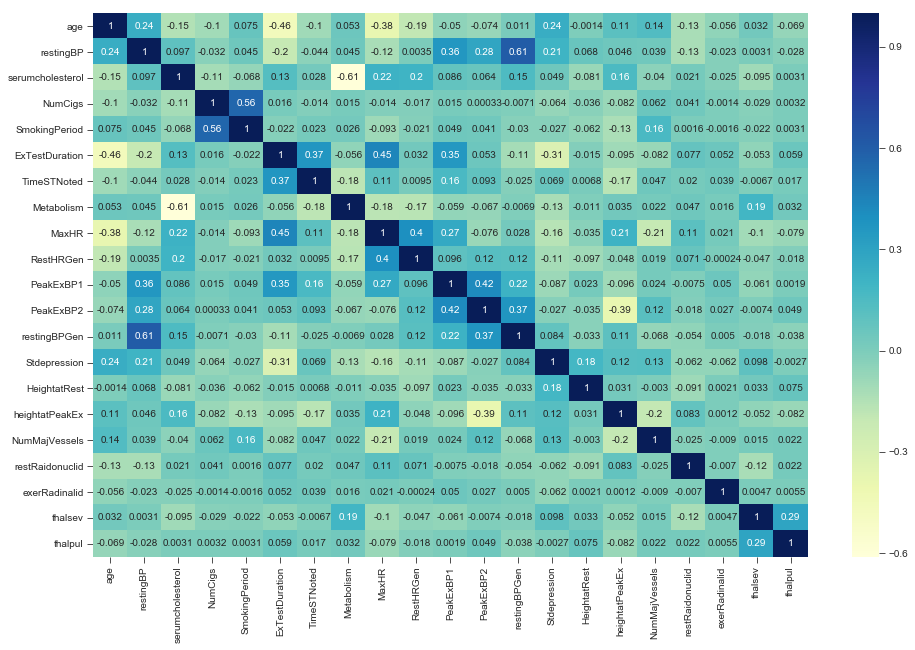

In [15]:
# Compute the correlation matrix
dp.get_correlation_plot(heartDiseaseData_dropped_attr)

__Observations__

1. None of the numerical attributes are higly correlated to each other. 

__Correlation of different attributes to target__

__1. Correlation of different numeric attributes to target__

In [16]:
heartDiseaseData_dropped_attr_num_target = pd.concat([heartDiseaseData_dropped_attr[num_col].reset_index(
    drop=True), heartDiseaseData_dropped_attr['Severity']], axis=1)
dm.logistic_regg_Corr(heartDiseaseData_dropped_attr_num_target, "Severity", solver='lbfgs')

Mean accuracy with column ExTestDuration is : 0.38875305623471884
Mean accuracy with column HeightatRest is : 0.3594132029339853
Mean accuracy with column MaxHR is : 0.4034229828850856
Mean accuracy with column Metabolism is : 0.3740831295843521
Mean accuracy with column NumCigs is : 0.35207823960880197
Mean accuracy with column NumMajVessels is : 0.36674816625916873
Mean accuracy with column PeakExBP1 is : 0.35207823960880197
Mean accuracy with column PeakExBP2 is : 0.34963325183374083
Mean accuracy with column RestHRGen is : 0.37163814180929094
Mean accuracy with column SmokingPeriod is : 0.35207823960880197
Mean accuracy with column Stdepression is : 0.38875305623471884
Mean accuracy with column TimeSTNoted is : 0.3569682151589242
Mean accuracy with column age is : 0.36185819070904646
Mean accuracy with column exerRadinalid is : 0.34963325183374083
Mean accuracy with column heightatPeakEx is : 0.34963325183374083
Mean accuracy with column restRaidonuclid is : 0.3569682151589242
Mean

__Observation__

1. None of the Numeric variable have a very high correlation with the target

__2. Correlation of different categorical attributes to target__

In [17]:
dm.get_chi_square_corr_score(heartDiseaseData_dropped_attr[cat_col], 'Severity', prob=0.95)

Confidence level=0.950 and significance level=0.050 

IV : gender and DV: Severity are dependent
IV : chestpainloc and DV: Severity are dependent
IV : painexertion and DV: Severity are dependent
IV : reliefbyrest and DV: Severity are dependent
IV : chestpaintype and DV: Severity are dependent
IV : IsSmoker and DV: Severity are independent
IV : FastingBS and DV: Severity are independent
IV : FamHistory and DV: Severity are independent
IV : restingECGRes and DV: Severity are dependent
IV : ECGspecsDigitalis and DV: Severity are independent
IV : ECGspecsBetaBlocker and DV: Severity are dependent
IV : ECGspecsNitrates and DV: Severity are dependent
IV : ECGspecsCalci and DV: Severity are dependent
IV : ECGspecsdiuretic and DV: Severity are dependent
IV : ExInducedAngina and DV: Severity are dependent
IV : xhypo and DV: Severity are dependent
IV : Slope and DV: Severity are dependent
IV : restwallmotion and DV: Severity are independent
IV : thalassemia and DV: Severity are dependent
IV : Se

__Inference from IV to target :  Data understanding__

__1. For numeric variables__

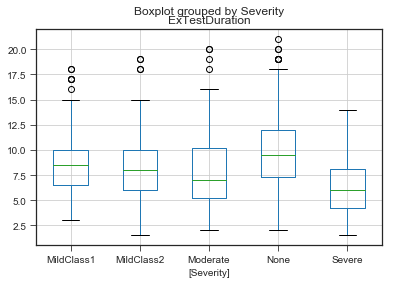

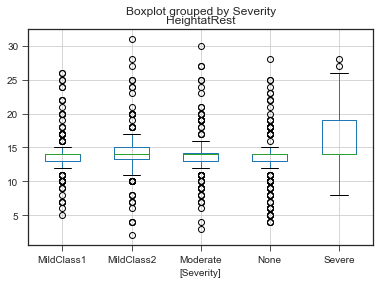

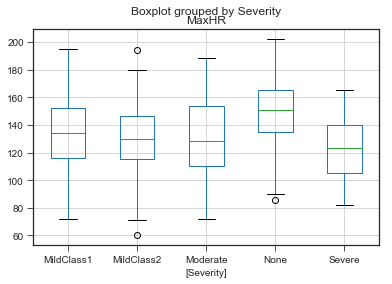

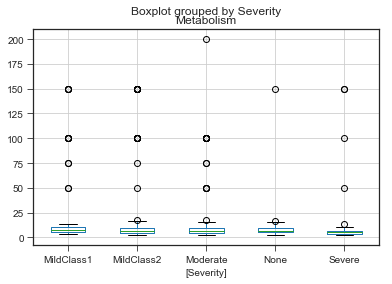

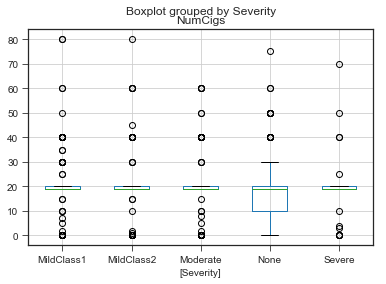

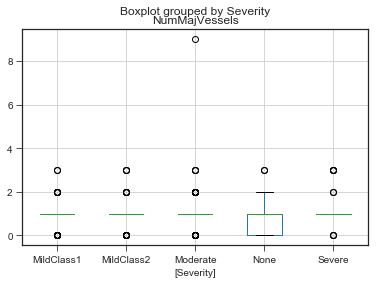

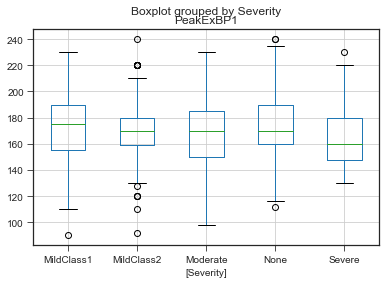

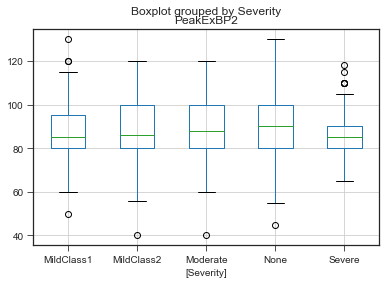

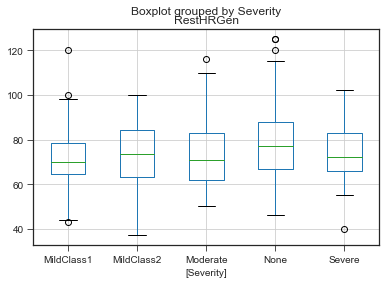

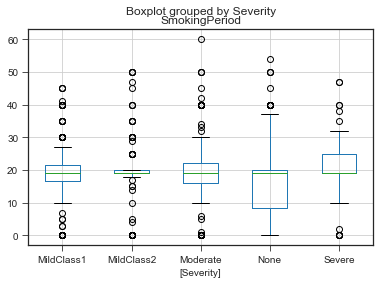

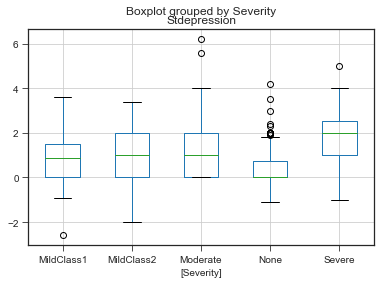

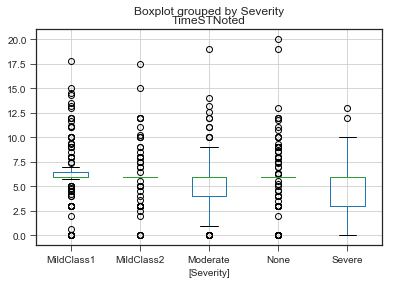

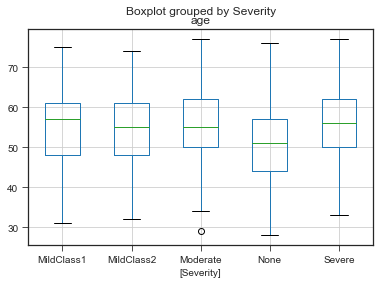

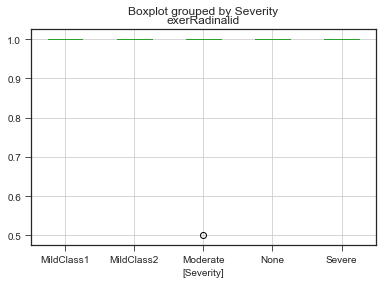

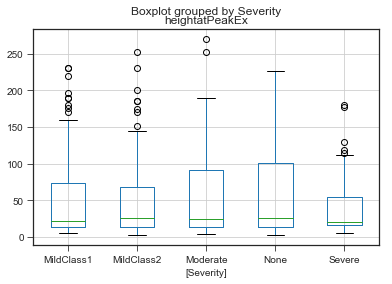

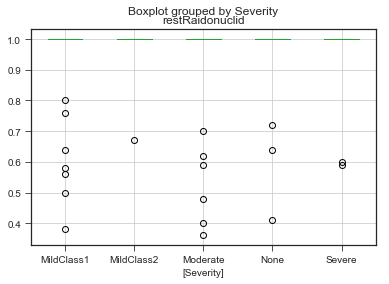

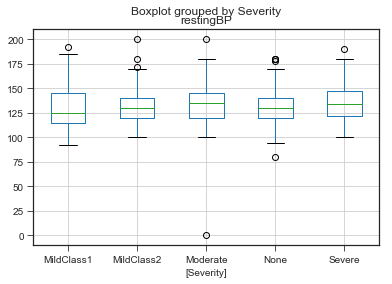

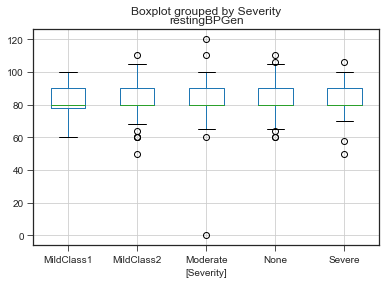

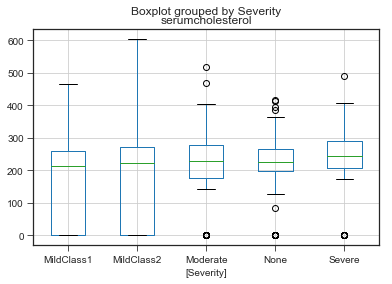

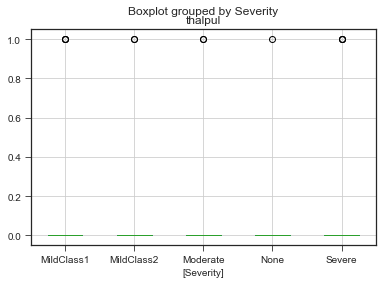

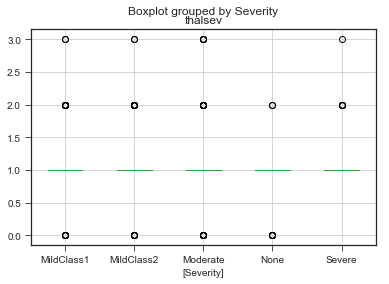

In [18]:
for col in heartDiseaseData_dropped_attr[num_col].columns:
    heartDiseaseData_dropped_attr[[col, 'Severity']].boxplot(by='Severity');

__2. For categorical variables__

In [19]:
# crosstab approach
for column in heartDiseaseData_dropped_attr[cat_col].columns:
    pd.crosstab(index=heartDiseaseData_dropped_attr[column],columns=heartDiseaseData_dropped_attr['Severity'])
    

Severity,MildClass1,MildClass2,Moderate,None,Severe
gender,,,,,
0,12,16,22,89,6
1,124,102,125,139,39


Severity,MildClass1,MildClass2,Moderate,None,Severe
chestpainloc,,,,,
0.0,5,3,5,18,0
1.0,123,111,130,190,43


Severity,MildClass1,MildClass2,Moderate,None,Severe
painexertion,,,,,
0.0,21,26,36,90,6
1.0,109,86,99,121,37


Severity,MildClass1,MildClass2,Moderate,None,Severe
reliefbyrest,,,,,
0.0,17,19,26,73,3
1.0,116,93,112,137,40


Severity,MildClass1,MildClass2,Moderate,None,Severe
chestpaintype,,,,,
1,4,4,6,18,0
2,11,9,23,75,2
3,22,23,32,76,6
4,99,82,86,59,37


Severity,MildClass1,MildClass2,Moderate,None,Severe
IsSmoker,,,,,
0.0,24,14,23,18,6
1.0,86,90,107,178,27


Severity,MildClass1,MildClass2,Moderate,None,Severe
FastingBS,,,,,
0.0,86,83,112,191,37
1.0,24,20,28,27,4


Severity,MildClass1,MildClass2,Moderate,None,Severe
FamHistory,,,,,
0.0,32,22,36,55,12
1.0,91,84,99,153,30


Severity,MildClass1,MildClass2,Moderate,None,Severe
restingECGRes,,,,,
0.0,84,74,85,150,19
1.0,23,27,30,30,11
2.0,29,17,31,48,15


Severity,MildClass1,MildClass2,Moderate,None,Severe
ECGspecsDigitalis,,,,,
0.0,124,104,128,208,40
1.0,2,5,3,6,2


Severity,MildClass1,MildClass2,Moderate,None,Severe
ECGspecsBetaBlocker,,,,,
0.0,76,74,97,179,29
1.0,51,35,34,35,13


Severity,MildClass1,MildClass2,Moderate,None,Severe
ECGspecsNitrates,,,,,
0.0,73,79,92,181,26
1.0,53,31,40,33,16


Severity,MildClass1,MildClass2,Moderate,None,Severe
ECGspecsCalci,,,,,
0.0,94,83,101,198,36
1.0,33,27,31,16,6


Severity,MildClass1,MildClass2,Moderate,None,Severe
ECGspecsdiuretic,,,,,
0.0,115,92,105,200,37
1.0,7,16,24,11,5


Severity,MildClass1,MildClass2,Moderate,None,Severe
ExInducedAngina,,,,,
0.0,63,55,66,188,14
1.0,64,57,68,27,29


Severity,MildClass1,MildClass2,Moderate,None,Severe
xhypo,,,,,
0.0,126,108,125,214,41
1.0,1,4,8,0,2


Severity,MildClass1,MildClass2,Moderate,None,Severe
Slope,,,,,
0.0,1,0,0,0,0
1.0,30,18,27,73,5
2.0,88,82,101,128,33
3.0,12,12,12,7,5


Severity,MildClass1,MildClass2,Moderate,None,Severe
restwallmotion,,,,,
0.0,100,95,118,193,36
1.0,1,0,0,2,0
2.0,2,0,4,0,0
3.0,1,0,0,0,0


Severity,MildClass1,MildClass2,Moderate,None,Severe
thalassemia,,,,,
1.0,0,1,1,1,0
2.0,0,1,0,0,0
3.0,72,69,94,171,21
4.0,0,0,1,0,0
5.0,1,2,0,0,0
6.0,7,8,6,4,3
7.0,37,30,32,22,14


Severity,MildClass1,MildClass2,Moderate,None,Severe
Severity,,,,,
MildClass1,136,0,0,0,0
MildClass2,0,118,0,0,0
Moderate,0,0,147,0,0
None,0,0,0,228,0
Severe,0,0,0,0,45


Severity,MildClass1,MildClass2,Moderate,None,Severe
LeftMaintrunk,,,,,
0.0,0,0,1,0,0
1.0,134,114,134,202,9
2.0,0,0,0,0,35
162.0,0,0,1,0,0


Severity,MildClass1,MildClass2,Moderate,None,Severe
ladproximation,,,,,
1.0,90,75,76,206,25
2.0,45,37,68,0,17


Severity,MildClass1,MildClass2,Moderate,None,Severe
laddistance,,,,,
1.0,104,75,89,212,34
2.0,29,37,47,0,10


Severity,MildClass1,MildClass2,Moderate,None,Severe
cxmain,,,,,
1.0,103,72,84,210,23
2.0,27,40,58,0,21


Severity,MildClass1,MildClass2,Moderate,None,Severe
ramus,,,,,
1.0,121,96,118,187,37
2.0,1,9,17,0,1


Severity,MildClass1,MildClass2,Moderate,None,Severe
obtuseMarginal1,,,,,
1.0,122,92,90,213,32
2.0,8,21,50,0,9


Severity,MildClass1,MildClass2,Moderate,None,Severe
obtuseMarginal2,,,,,
1.0,128,104,126,175,37
2.0,0,6,8,0,2


Severity,MildClass1,MildClass2,Moderate,None,Severe
rcaproximation,,,,,
1.0,102,65,73,210,21
2.0,26,47,71,0,22


Severity,MildClass1,MildClass2,Moderate,None,Severe
rcadistance,,,,,
1.0,119,93,92,211,38
2.0,12,20,43,0,6


Severity,MildClass1,MildClass2,Moderate,None,Severe
Location,,,,,
Cleveland,39,30,41,98,11
Hungarian,25,37,47,98,15
Switzerland,32,23,19,7,7
Va,40,28,40,25,12


__Distribution across target__

None          228
Moderate      147
MildClass1    136
MildClass2    118
Severe         45
Name: Severity, dtype: int64
None          33.827893
Moderate      21.810089
MildClass1    20.178042
MildClass2    17.507418
Severe         6.676558
Name: Severity, dtype: float64


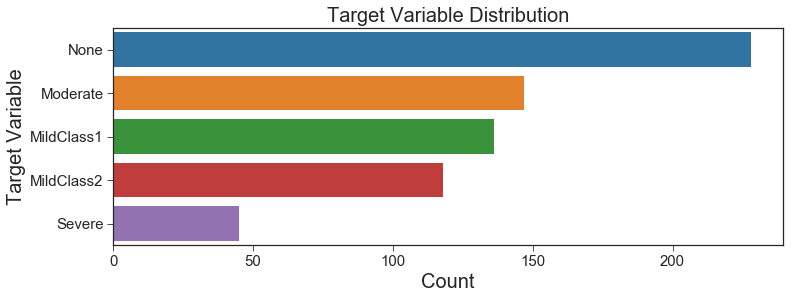

In [20]:
dp.plot_data_dist_across_targ(heartDiseaseData_dropped_attr, "Severity")

In [21]:
heartDiseaseData_dropped_attr.shape

(674, 51)

__Outlier Detection__

__1. Using individual numeric columns : based on target__

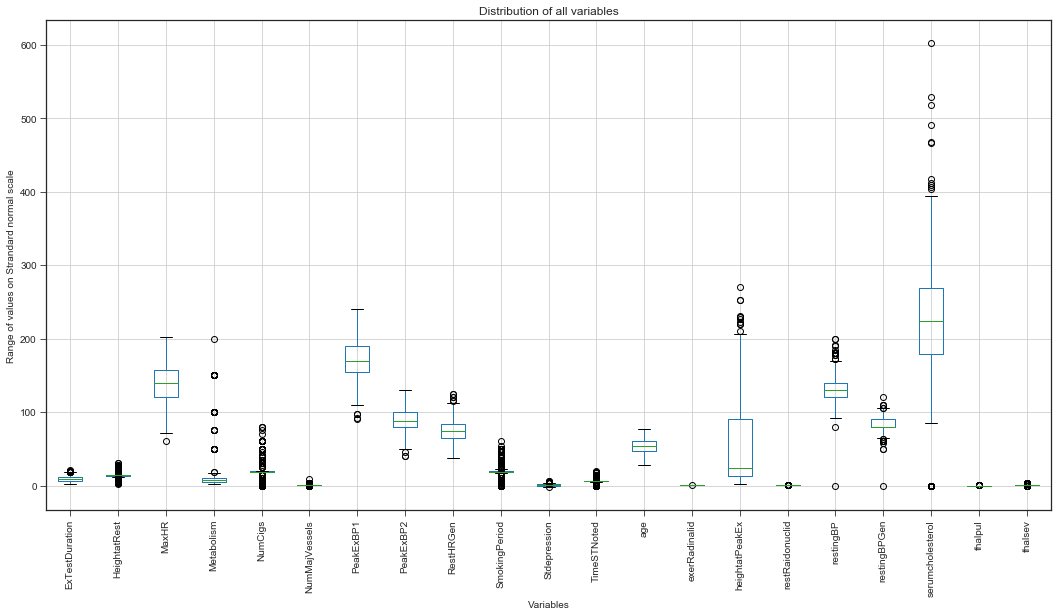

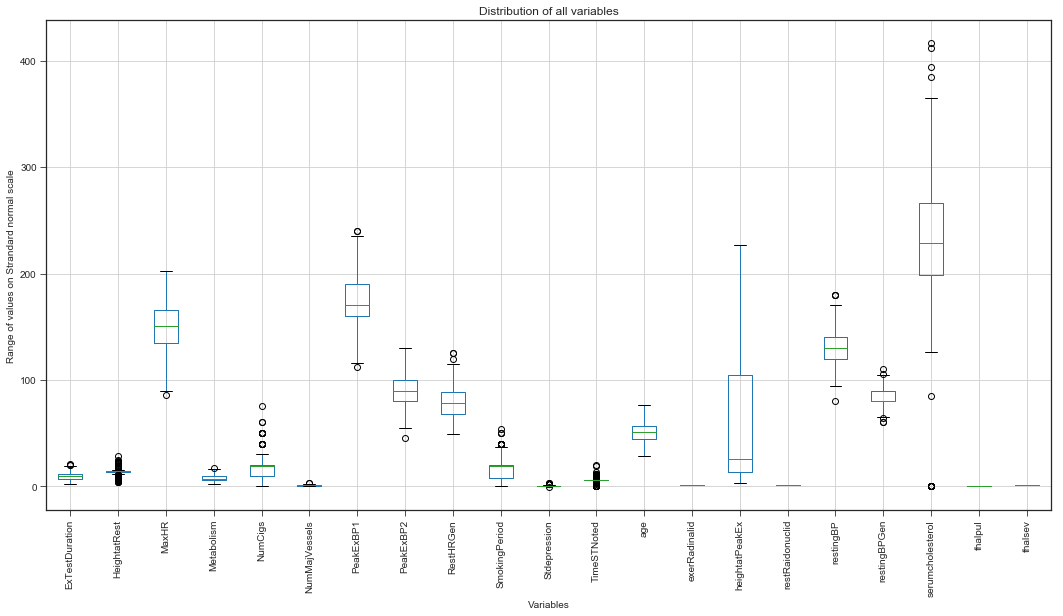

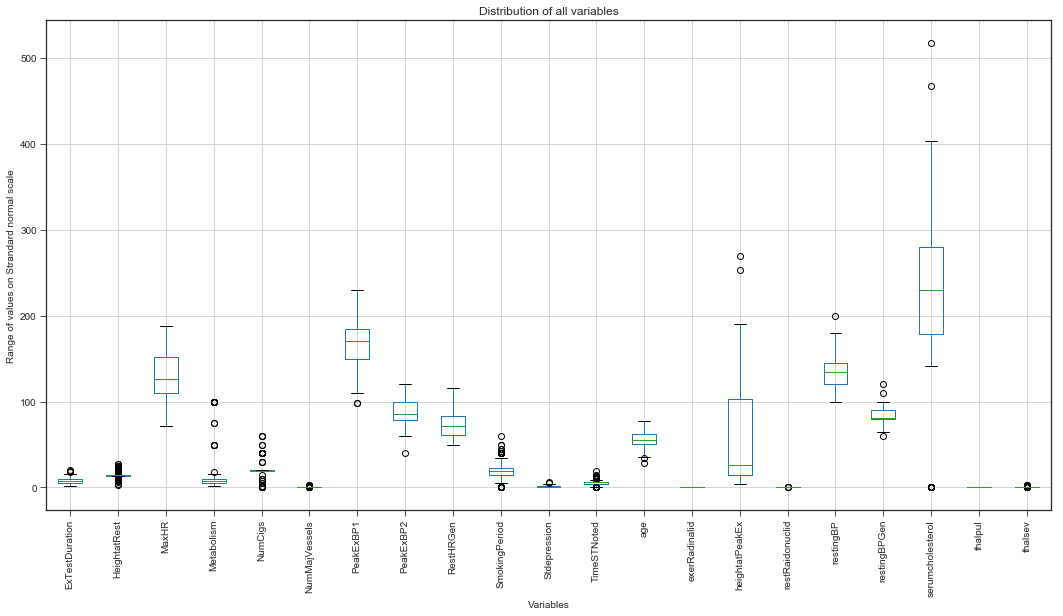

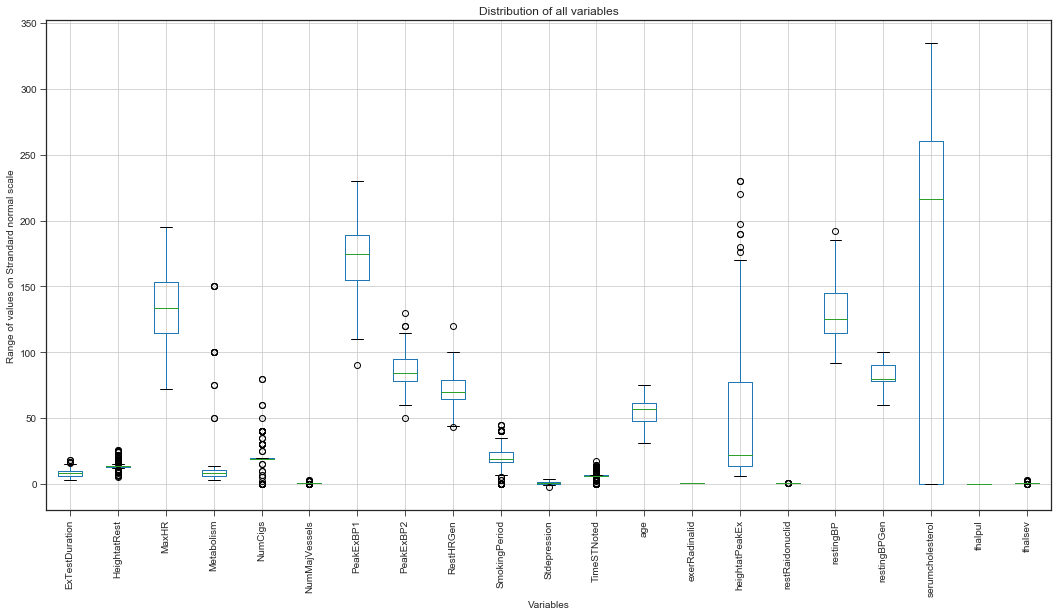

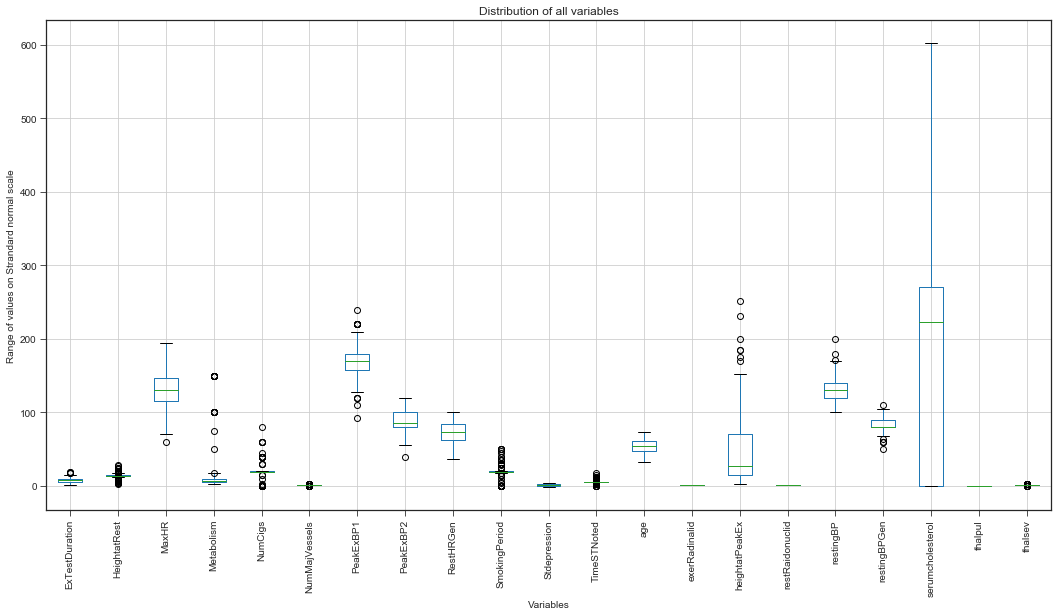

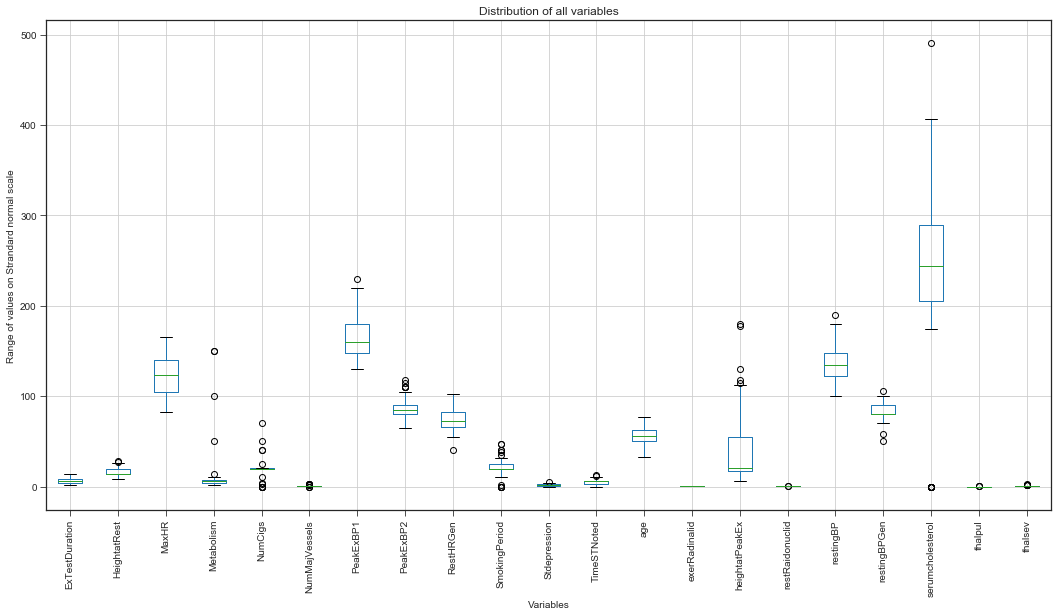

In [22]:
dp.distribution_of_var(heartDiseaseData_dropped_attr[num_col])

heartDiseaseData_dropped_attr_num_target = pd.concat(
    [heartDiseaseData_dropped_attr[num_col], heartDiseaseData_dropped_attr['Severity']], axis=1)


heartDiseaseData_dropped_attr_None_sig = di.get_outlier_removed_by_sigma_dist(
    heartDiseaseData_dropped_attr_num_target, "Severity","None", 5)
dp.distribution_of_var(heartDiseaseData_dropped_attr_None_sig)

heartDiseaseData_dropped_attr_Moderate_sig = di.get_outlier_removed_by_sigma_dist(
    heartDiseaseData_dropped_attr_num_target, "Severity","Moderate", 5)
dp.distribution_of_var(heartDiseaseData_dropped_attr_Moderate_sig)

heartDiseaseData_dropped_attr_MildClass1_sig = di.get_outlier_removed_by_sigma_dist(
    heartDiseaseData_dropped_attr_num_target, "Severity","MildClass1", 5)
dp.distribution_of_var(heartDiseaseData_dropped_attr_MildClass1_sig)

heartDiseaseData_dropped_attr_MildClass2_sig = di.get_outlier_removed_by_sigma_dist(
    heartDiseaseData_dropped_attr_num_target, "Severity","MildClass2", 5)
dp.distribution_of_var(heartDiseaseData_dropped_attr_MildClass2_sig)

heartDiseaseData_dropped_attr_Severe_sig = di.get_outlier_removed_by_sigma_dist(
    heartDiseaseData_dropped_attr_num_target, "Severity","Severe", 5)
dp.distribution_of_var(heartDiseaseData_dropped_attr_Severe_sig)

(647, 21)

,ExTestDuration,HeightatRest,MaxHR,Metabolism,NumCigs,NumMajVessels,PeakExBP1,PeakExBP2,RestHRGen,SmokingPeriod,Stdepression,TimeSTNoted,age,exerRadinalid,heightatPeakEx,restRaidonuclid,restingBP,restingBPGen,serumcholesterol,thalpul,thalsev
0,7.0,14.0,163.0,8.0,0.0,0.0,140.0,70.0,94.0,0.0,0.0,6.0,41.0,1.0,92.0,1.0,126.0,90.0,306.0,0.0,1.0
1,5.0,15.0,135.0,3.0,19.0,1.0,180.0,115.0,82.0,19.0,0.0,NaN,44.0,1.0,15.0,1.0,130.0,100.0,215.0,0.0,1.0
2,10.5,14.0,162.0,11.0,40.0,0.0,155.0,68.0,77.0,20.0,0.0,6.0,42.0,1.0,50.0,1.0,120.0,85.0,295.0,NaN,1.0
3,8.0,NaN,151.0,9.0,20.0,0.0,150.0,80.0,73.0,30.0,0.4,0.0,66.0,1.0,157.0,1.0,120.0,80.0,302.0,0.0,1.0
4,11.0,14.0,174.0,13.0,15.0,0.0,192.0,80.0,60.0,40.0,1.6,6.0,57.0,1.0,150.0,1.0,150.0,90.0,168.0,0.0,1.0


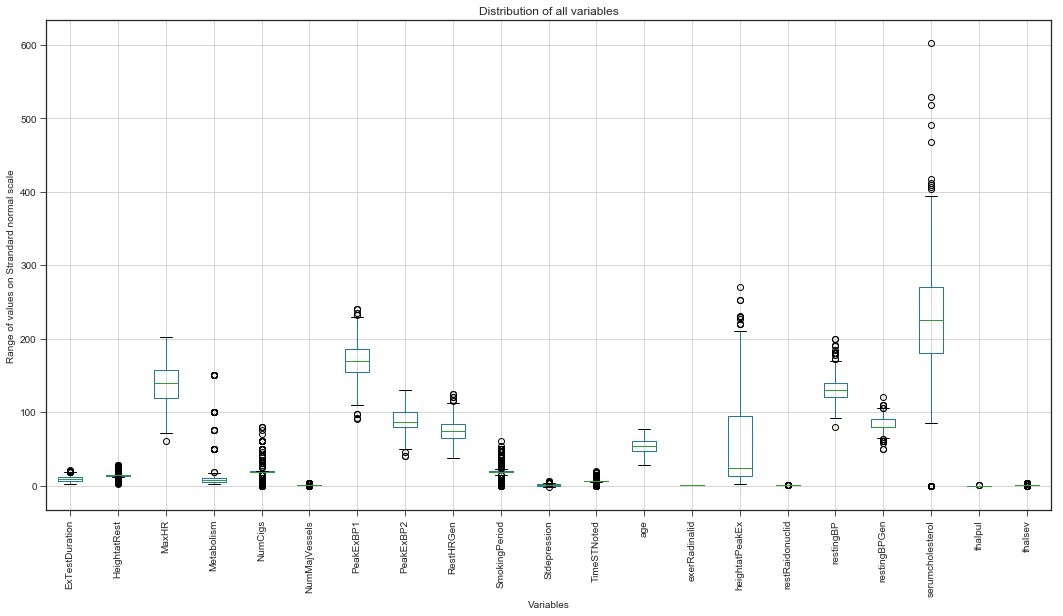

In [23]:
#Append all dataframes with diff target

heartDiseaseData_dropped_attr_outlier_removed = heartDiseaseData_dropped_attr_None_sig.append(
    heartDiseaseData_dropped_attr_Moderate_sig).append(
    heartDiseaseData_dropped_attr_MildClass1_sig).append(
    heartDiseaseData_dropped_attr_MildClass2_sig).append(
    heartDiseaseData_dropped_attr_Severe_sig).reset_index(drop=True)

heartDiseaseData_dropped_attr_outlier_removed.shape
heartDiseaseData_dropped_attr_outlier_removed.head()


dp.distribution_of_var(heartDiseaseData_dropped_attr_outlier_removed)


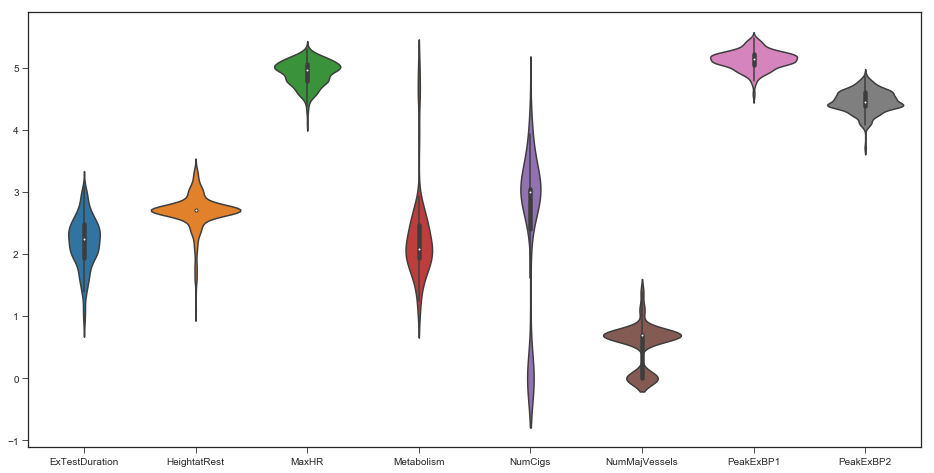

In [24]:
heartDiseaseData_dropped_attr_outlier_removed_log = np.log(
    (heartDiseaseData_dropped_attr_outlier_removed.dropna())+1)
dp.draw_violin_plot(heartDiseaseData_dropped_attr_outlier_removed_log.iloc[:,0:8])

In [25]:
# Add the rest of columns for the outlier removed rows
heartDiseaseData_dropped_attr_no_outlier = heartDiseaseData_dropped_attr[
    heartDiseaseData_dropped_attr.index.isin(heartDiseaseData_dropped_attr_outlier_removed.index)]

heartDiseaseData_dropped_attr_no_outlier.shape
heartDiseaseData_dropped_attr_no_outlier.head()


(647, 51)

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,exerRadinalid,thalassemia,thalsev,thalpul,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,Severity
0,37.0,1,1.0,0.0,0.0,3,118.0,240.0,0.0,NaN,19.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,13.0,165.0,63.0,168.0,88.0,72.0,0.0,0.0,1.0,2.0,25.0,22.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Va,None
1,41.0,0,NaN,NaN,NaN,2,126.0,306.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,163.0,94.0,140.0,70.0,90.0,0.0,0.0,0.0,1.0,14.0,92.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,Cleveland,None
2,54.0,1,0.0,0.0,0.0,1,120.0,171.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,7.0,137.0,68.0,182.0,110.0,82.0,0.0,0.0,2.0,1.0,24.0,23.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,Moderate
3,44.0,1,1.0,0.0,0.0,2,130.0,215.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,3.0,135.0,82.0,180.0,115.0,100.0,0.0,0.0,0.0,2.0,15.0,15.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,None
4,58.0,1,1.0,0.0,0.0,2,130.0,251.0,NaN,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,5.0,110.0,58.0,220.0,120.0,80.0,0.0,0.0,0.0,2.0,4.0,6.0,1.0,NaN,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,MildClass2


__Distribution of target attribute__

None          219
Moderate      139
MildClass1    130
MildClass2    115
Severe         44
Name: Severity, dtype: int64
None          33.848532
Moderate      21.483771
MildClass1    20.092736
MildClass2    17.774343
Severe         6.800618
Name: Severity, dtype: float64


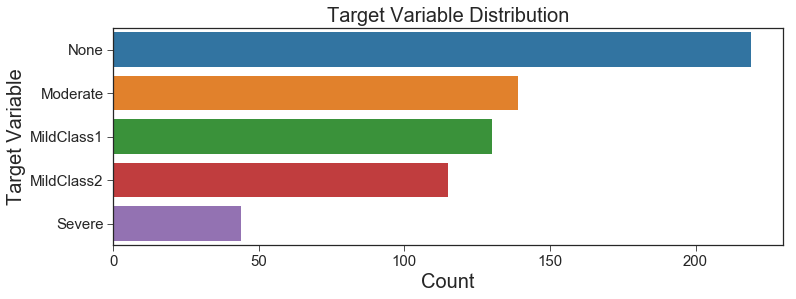

In [26]:
dp.plot_data_dist_across_targ(heartDiseaseData_dropped_attr_no_outlier, "Severity")

__After outlier removal also, we have made sure the distribution across target classes are same__

__Get VIF of each num attribute__

In [27]:
di.get_vif(heartDiseaseData_dropped_attr_no_outlier[num_col])

,VIF_Factor,features
13,419.311939,exerRadinalid
15,243.675980,restRaidonuclid
17,128.607665,restingBPGen
16,108.435714,restingBP
6,89.716977,PeakExBP1
7,65.043728,PeakExBP2
2,62.120987,MaxHR
12,51.067711,age
8,41.009496,RestHRGen
1,15.342193,HeightatRest


__Observation__
1. Attribute exerRadinalid has a very high VIF also we noticed it has two distinct values, with only one 1 value occuring 1 time. So we can drop this attribute.

In [28]:
heartDiseaseData_dropped_attr_no_vif_no_outlier = heartDiseaseData_dropped_attr_no_outlier.drop(
    ['exerRadinalid'], axis=1)
heartDiseaseData_dropped_attr_no_vif_no_outlier.head()
heartDiseaseData_dropped_attr_no_vif_no_outlier.shape


,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,thalassemia,thalsev,thalpul,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,Severity
0,37.0,1,1.0,0.0,0.0,3,118.0,240.0,0.0,NaN,19.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,13.0,165.0,63.0,168.0,88.0,72.0,0.0,0.0,1.0,2.0,25.0,22.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Va,None
1,41.0,0,NaN,NaN,NaN,2,126.0,306.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,163.0,94.0,140.0,70.0,90.0,0.0,0.0,0.0,1.0,14.0,92.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,Cleveland,None
2,54.0,1,0.0,0.0,0.0,1,120.0,171.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,7.0,137.0,68.0,182.0,110.0,82.0,0.0,0.0,2.0,1.0,24.0,23.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,Moderate
3,44.0,1,1.0,0.0,0.0,2,130.0,215.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,3.0,135.0,82.0,180.0,115.0,100.0,0.0,0.0,0.0,2.0,15.0,15.0,1.0,1.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,None
4,58.0,1,1.0,0.0,0.0,2,130.0,251.0,NaN,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,5.0,110.0,58.0,220.0,120.0,80.0,0.0,0.0,0.0,2.0,4.0,6.0,1.0,NaN,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,MildClass2


(647, 50)

__Get Number of missing values in each row__

In [29]:
heartDiseaseData_dropped_attr_no_vif_no_outlier_missing_row = di.get_missing_value_by_row(
    heartDiseaseData_dropped_attr_no_vif_no_outlier)

heartDiseaseData_dropped_attr_no_vif_no_outlier_missing_row



0      95
1     163
2     145
3     103
4      52
5      27
6      11
7       5
8       4
10      1
16     11
17     17
18     11
19      2
Name: count_of_null, dtype: int64

__Observation__
1. Only few columns have high missing values, so don't drop any row.

__Check count of null in each column & its percent__

In [30]:
di.get_null_count_per_attribute(heartDiseaseData_dropped_attr_no_vif_no_outlier)

,total_missing,perc_missing
restwallmotion,117,18.083462
IsSmoker,96,14.837713
obtuseMarginal2,87,13.446677
ramus,84,12.982998
Metabolism,78,12.055641
thalassemia,71,10.973725
FastingBS,62,9.582689
FamHistory,59,9.119011
ECGspecsdiuretic,58,8.964451
ECGspecsDigitalis,49,7.573416


## EDA

__Get altered datatypes__

In [31]:
num_col = heartDiseaseData_dropped_attr_no_vif_no_outlier.select_dtypes(include='float').columns
cat_col = heartDiseaseData_dropped_attr_no_vif_no_outlier.select_dtypes(include='category').columns

__Pair wise distribution of numeric attr__

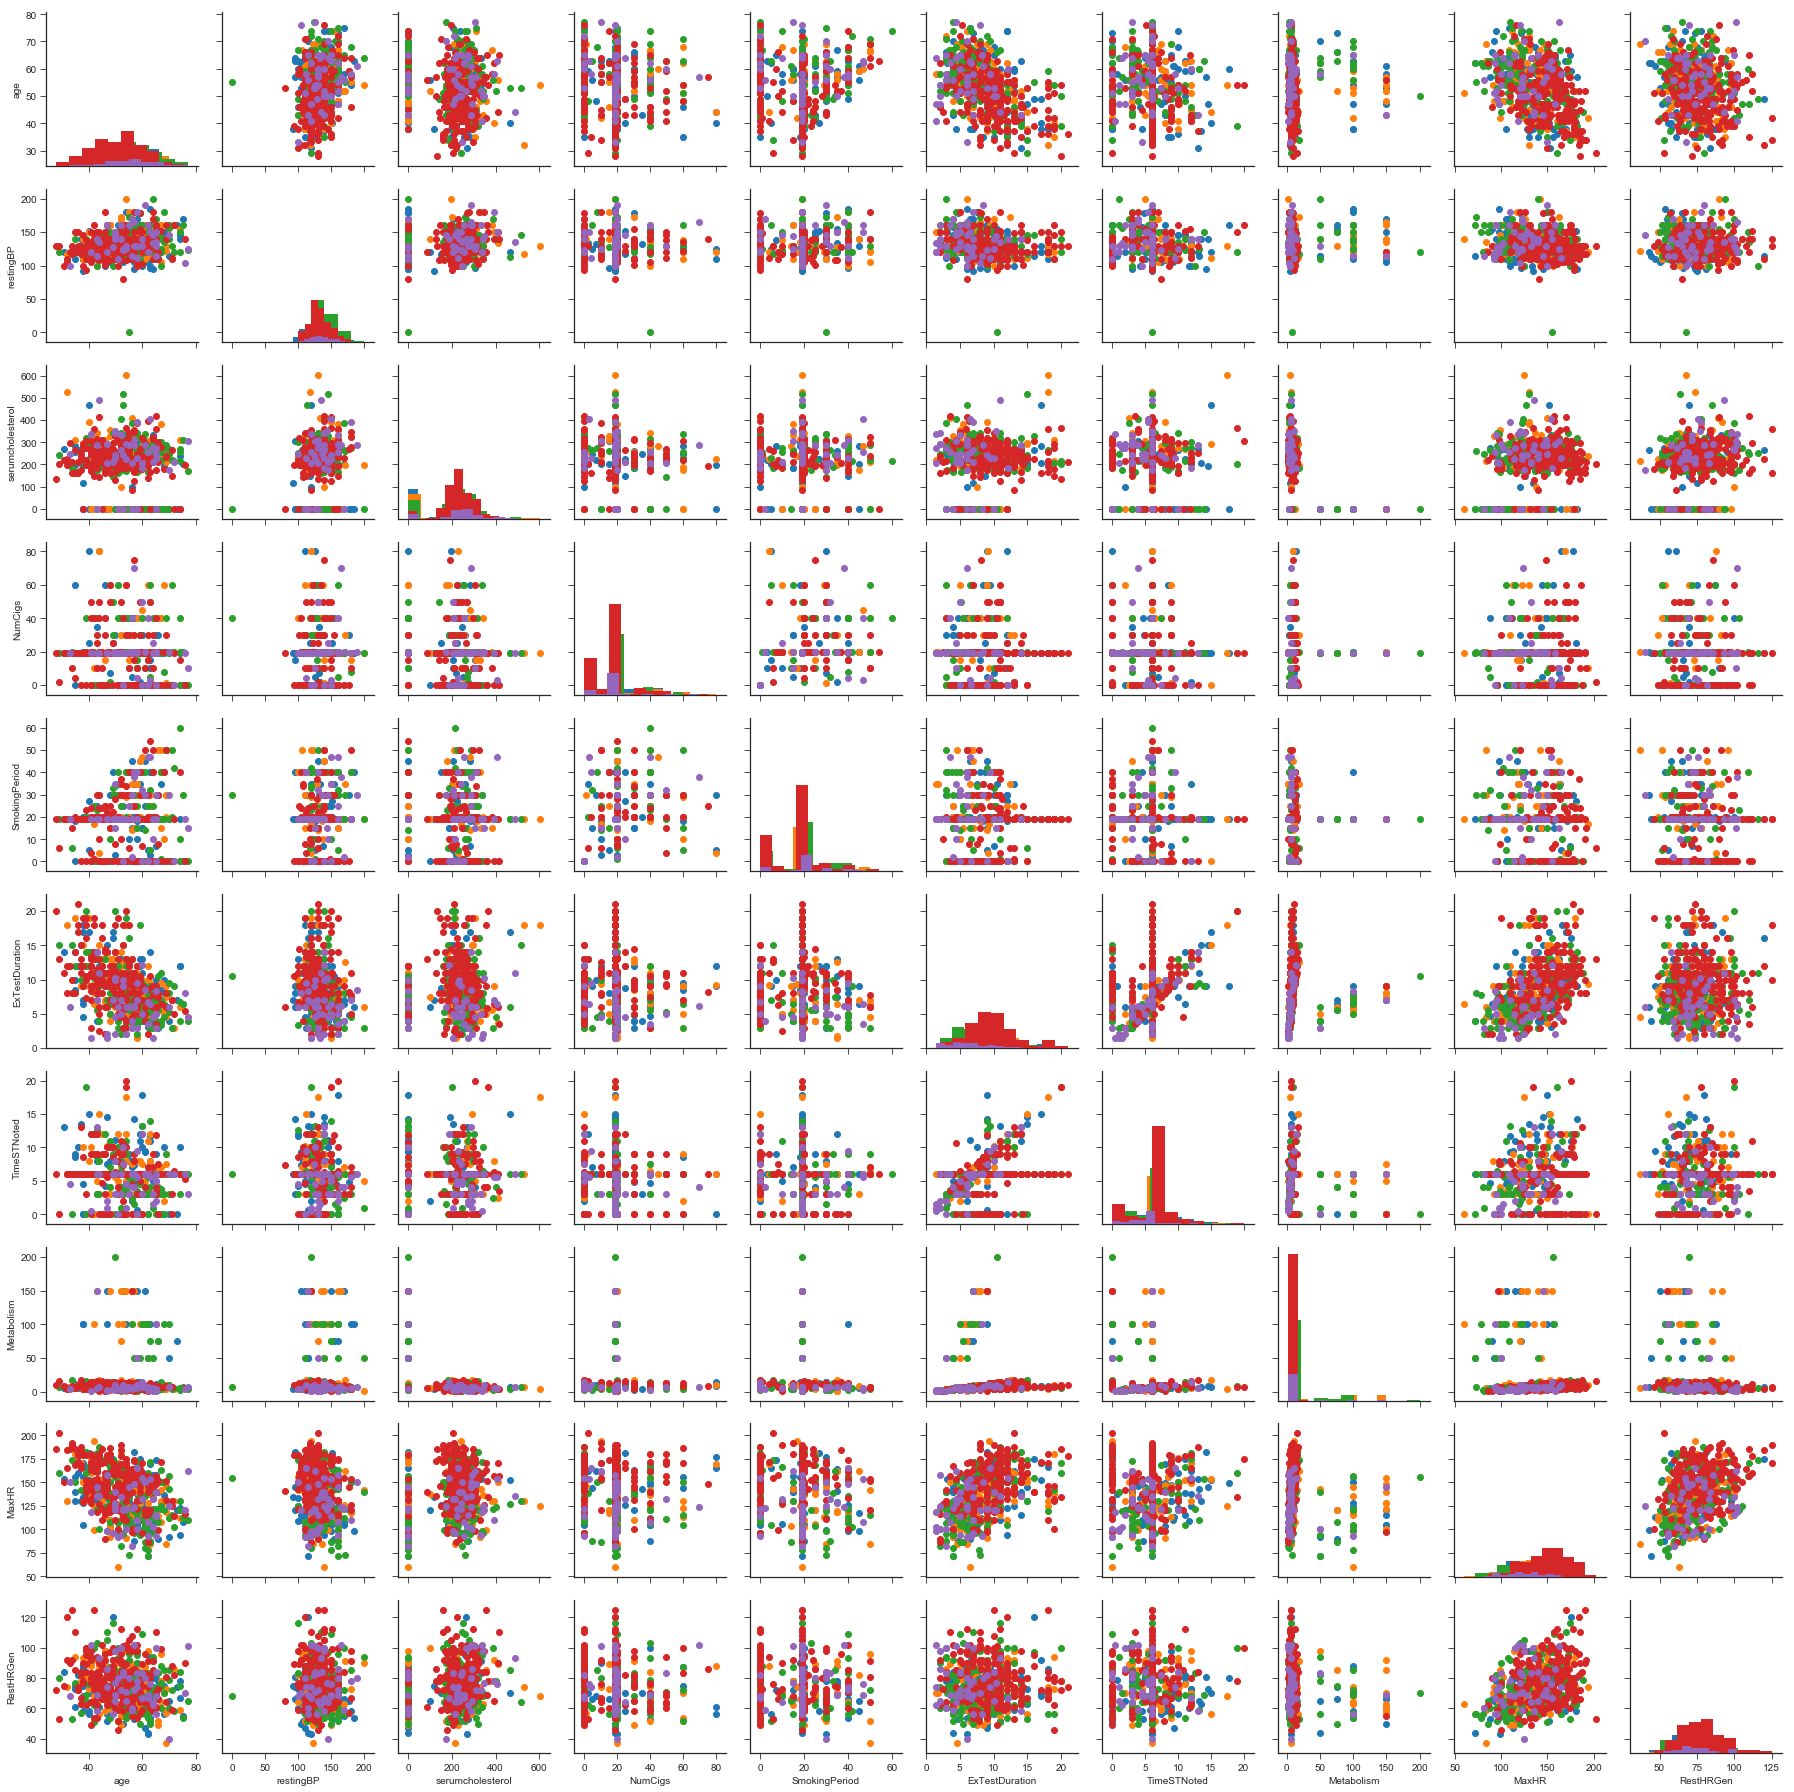

In [32]:
heartDiseaseData_dropped_attr_no_vif_no_outlier_1 = pd.concat(
    [heartDiseaseData_dropped_attr_no_vif_no_outlier[num_col].iloc[:,0:10].reset_index(drop=True), 
     heartDiseaseData_dropped_attr_no_vif_no_outlier[['Severity']]], axis=1)

dp.draw_pair_plot(heartDiseaseData_dropped_attr_no_vif_no_outlier_1, 'Severity')

__PCA__

In [33]:
heartDiseaseData_dropped_attr_no_vif_no_outlier_num = dma.impute_num(
    heartDiseaseData_dropped_attr_no_vif_no_outlier[num_col], "mean")

heartDiseaseData_dropped_attr_no_vif_no_outlier_cat = dma.impute_cat(
    heartDiseaseData_dropped_attr_no_vif_no_outlier[cat_col], "mode")

heartDiseaseData_dropped_attr_no_vif_no_outlier_pca = pd.concat(
    [heartDiseaseData_dropped_attr_no_vif_no_outlier_num, 
     heartDiseaseData_dropped_attr_no_vif_no_outlier_cat], axis=1)


heartDiseaseData_dropped_attr_no_vif_no_outlier_pca.head()
heartDiseaseData_dropped_attr_no_vif_no_outlier_pca.shape


#dp.draw_pca_plot(heartDiseaseData_dropped_attr_no_vif_no_outlier_pca)

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,Stdepression,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,thalsev,thalpul,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,IsSmoker,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExInducedAngina,xhypo,Slope,restwallmotion,thalassemia,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,Severity
0,37.0,118.0,240.0,18.436306,19.0,12.0,6.000000,13.0,165.0,63.0,168.0,88.0,72.0,1.0,25.0,22.0,1.0,1.000000,0.0,0.0,1,1.0,0.0,0.0,3,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Va,None
1,41.0,126.0,306.0,0.000000,0.0,7.0,6.000000,8.0,163.0,94.0,140.0,70.0,90.0,0.0,14.0,92.0,0.0,1.000000,1.0,0.0,0,1.0,1.0,1.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cleveland,None
2,54.0,120.0,171.0,19.000000,19.0,13.0,10.000000,7.0,137.0,68.0,182.0,110.0,82.0,2.0,24.0,23.0,1.0,1.000000,1.0,0.0,1,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,Moderate
3,44.0,130.0,215.0,19.000000,19.0,5.0,5.829206,3.0,135.0,82.0,180.0,115.0,100.0,0.0,15.0,15.0,1.0,1.000000,1.0,0.0,1,1.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,None
4,58.0,130.0,251.0,19.000000,19.0,12.0,6.000000,5.0,110.0,58.0,220.0,120.0,80.0,0.0,4.0,6.0,1.0,0.987577,1.0,0.0,1,1.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,MildClass2


(647, 50)

In [34]:
#Dumiphy categorical values to do PCA
target_col = ["Severity"]
other_cat_col = list(set(cat_col) - set(target_col))

heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_cat = pd.get_dummies(
    heartDiseaseData_dropped_attr_no_vif_no_outlier_pca[other_cat_col])

#Merge with num variables
heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_1 = pd.concat(
    [heartDiseaseData_dropped_attr_no_vif_no_outlier_pca[num_col], 
     heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_cat], axis=1)

heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2 = pd.concat(
    [heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_1, 
     heartDiseaseData_dropped_attr_no_vif_no_outlier_pca[target_col]], axis=1)


heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2.shape
heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2.head()

(647, 95)

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,Stdepression,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,thalsev,thalpul,ECGspecsCalci_0.0,ECGspecsCalci_1.0,rcadistance_1.0,rcadistance_2.0,ECGspecsDigitalis_0.0,ECGspecsDigitalis_1.0,rcaproximation_1.0,rcaproximation_2.0,restwallmotion_0.0,restwallmotion_1.0,...,FastingBS_0.0,FastingBS_1.0,ECGspecsBetaBlocker_0.0,ECGspecsBetaBlocker_1.0,ramus_1.0,ramus_2.0,Location_Cleveland,Location_Hungarian,Location_Switzerland,Location_Va,reliefbyrest_0.0,reliefbyrest_1.0,gender_0,gender_1,painexertion_0.0,painexertion_1.0,xhypo_0.0,xhypo_1.0,FamHistory_0.0,FamHistory_1.0,laddistance_1.0,laddistance_2.0,ladproximation_1.0,ladproximation_2.0,obtuseMarginal1_1.0,obtuseMarginal1_2.0,restingECGRes_0.0,restingECGRes_1.0,restingECGRes_2.0,Severity
0,37.0,118.0,240.0,18.436306,19.0,12.0,6.000000,13.0,165.0,63.0,168.0,88.0,72.0,1.0,25.0,22.0,1.0,1.000000,0.0,0.0,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,None
1,41.0,126.0,306.0,0.000000,0.0,7.0,6.000000,8.0,163.0,94.0,140.0,70.0,90.0,0.0,14.0,92.0,0.0,1.000000,1.0,0.0,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,None
2,54.0,120.0,171.0,19.000000,19.0,13.0,10.000000,7.0,137.0,68.0,182.0,110.0,82.0,2.0,24.0,23.0,1.0,1.000000,1.0,0.0,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,Moderate
3,44.0,130.0,215.0,19.000000,19.0,5.0,5.829206,3.0,135.0,82.0,180.0,115.0,100.0,0.0,15.0,15.0,1.0,1.000000,1.0,0.0,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,None
4,58.0,130.0,251.0,19.000000,19.0,12.0,6.000000,5.0,110.0,58.0,220.0,120.0,80.0,0.0,4.0,6.0,1.0,0.987577,1.0,0.0,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,MildClass2


,Number of PC,Cumulative Sum of variance
0,1,0.668314
1,2,0.844770
2,3,0.886775
3,4,0.921634
4,5,0.948555
5,6,0.961596
6,7,0.974373
7,8,0.982266
8,9,0.988622
9,10,0.992674


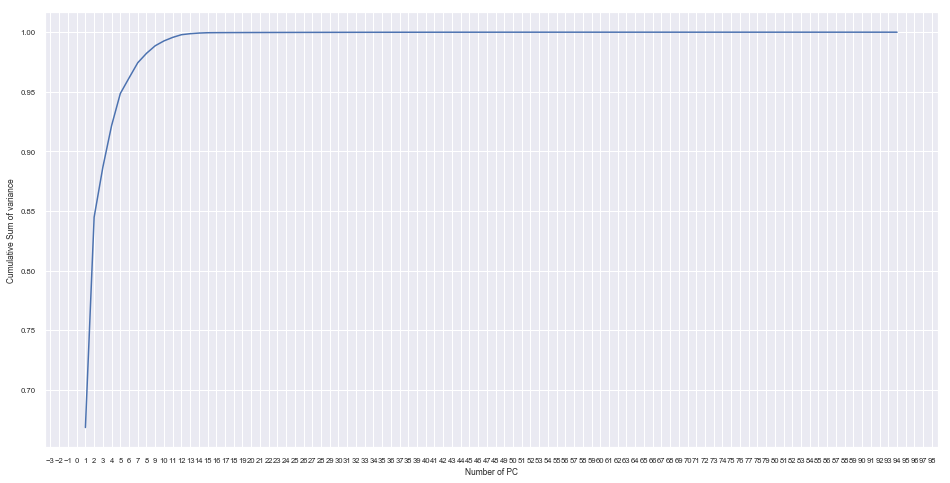

In [35]:
heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2_df = dma.get_pca_transformation_stats(
    heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2.drop("Severity", axis=1))
heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2_df.head(10)

dp.draw_pca_plot(heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2_df)

__Observation__

1. The first 8 PC's address 98.2% of data

__Visualize these datapoints in 2D space__

,pc1,pc2,Severity
0,35.111219,-35.649838,None
1,108.969025,29.477252,None
2,-32.791575,-33.422168,Moderate
3,10.849478,-46.731496,None
4,43.484306,-63.156296,MildClass2


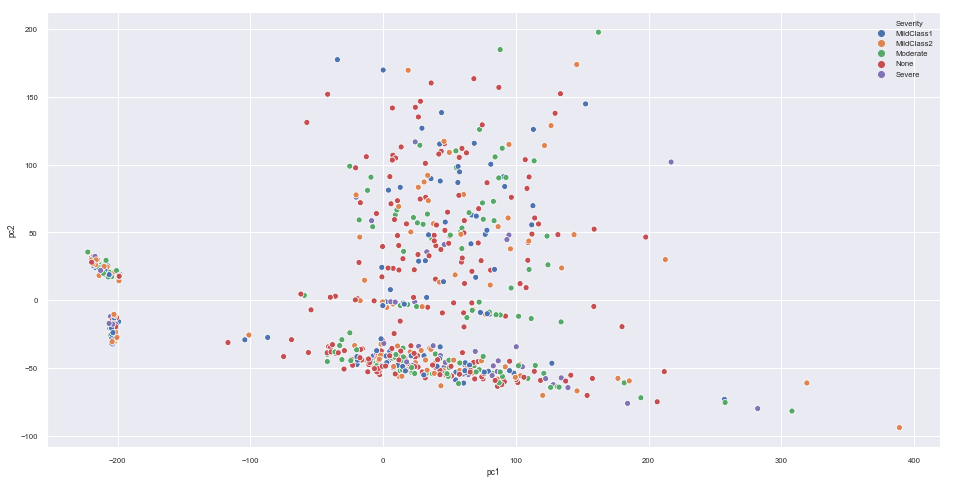

In [36]:
heartDiseaseData_pca_reduced = dma.get_two_pca_trnsformed_data(
    heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2.drop("Severity", axis=1))
heartDiseaseData_pca_reduced_1 = pd.concat([heartDiseaseData_pca_reduced, 
                                           heartDiseaseData_dropped_attr_no_vif_no_outlier_pca_2[["Severity"]]], axis=1)
heartDiseaseData_pca_reduced_1.head()
dp.draw_scatter_plot_by_cat(heartDiseaseData_pca_reduced_1, "Severity")

## Data PreProcessing

###  Train-Test Split

In [37]:
heartDiseaseData_dropped_attr_no_vif_no_outlier.shape
heartDiseaseData_dropped_attr_no_vif_no_outlier.head()

(647, 50)

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,thalassemia,thalsev,thalpul,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,Severity
0,37.0,1,1.0,0.0,0.0,3,118.0,240.0,0.0,NaN,19.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,13.0,165.0,63.0,168.0,88.0,72.0,0.0,0.0,1.0,2.0,25.0,22.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Va,None
1,41.0,0,NaN,NaN,NaN,2,126.0,306.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,163.0,94.0,140.0,70.0,90.0,0.0,0.0,0.0,1.0,14.0,92.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,Cleveland,None
2,54.0,1,0.0,0.0,0.0,1,120.0,171.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,7.0,137.0,68.0,182.0,110.0,82.0,0.0,0.0,2.0,1.0,24.0,23.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,Moderate
3,44.0,1,1.0,0.0,0.0,2,130.0,215.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,3.0,135.0,82.0,180.0,115.0,100.0,0.0,0.0,0.0,2.0,15.0,15.0,1.0,1.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Hungarian,None
4,58.0,1,1.0,0.0,0.0,2,130.0,251.0,NaN,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,5.0,110.0,58.0,220.0,120.0,80.0,0.0,0.0,0.0,2.0,4.0,6.0,1.0,NaN,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,MildClass2


In [38]:
X=heartDiseaseData_dropped_attr_no_vif_no_outlier.drop("Severity", axis=1)
y=heartDiseaseData_dropped_attr_no_vif_no_outlier["Severity"]

__Split__

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(517, 49)
(130, 49)
(517,)
(130,)


## Model Building
###  Building Pipeline

In [41]:
num_col_split = list(X_train.select_dtypes(include='float').columns)
cat_col_split = list(X_train.select_dtypes(include='category').columns)

num_col_split
cat_col_split

['age',
 'restingBP',
 'serumcholesterol',
 'NumCigs',
 'SmokingPeriod',
 'ExTestDuration',
 'TimeSTNoted',
 'Metabolism',
 'MaxHR',
 'RestHRGen',
 'PeakExBP1',
 'PeakExBP2',
 'restingBPGen',
 'Stdepression',
 'HeightatRest',
 'heightatPeakEx',
 'NumMajVessels',
 'restRaidonuclid',
 'thalsev',
 'thalpul']

['gender',
 'chestpainloc',
 'painexertion',
 'reliefbyrest',
 'chestpaintype',
 'IsSmoker',
 'FastingBS',
 'FamHistory',
 'restingECGRes',
 'ECGspecsDigitalis',
 'ECGspecsBetaBlocker',
 'ECGspecsNitrates',
 'ECGspecsCalci',
 'ECGspecsdiuretic',
 'ExInducedAngina',
 'xhypo',
 'Slope',
 'restwallmotion',
 'thalassemia',
 'LeftMaintrunk',
 'ladproximation',
 'laddistance',
 'cxmain',
 'ramus',
 'obtuseMarginal1',
 'obtuseMarginal2',
 'rcaproximation',
 'rcadistance',
 'Location']

__Impute and scale attributes__

In [42]:
num_transformer_step = {"imputer":"mean", "scaler":"StandardScaler"}
num_transformer = dma.define_num_transformer(**num_transformer_step)

cat_transformer_step = {"imputer":"most_frequent", "dummyfication_onehot":"OneHotEncoder"}
cat_transformer = dma.define_cat_transformer(**cat_transformer_step)

preprocessor = dma.get_column_transformer(num_transformer, num_col_split, cat_transformer, cat_col_split)
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory='./',
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'restingBP', 'serumcholesterol', 'NumCigs', 'SmokingP...main', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance', 'Location'])])

In [43]:
#Pipeline steps to be added to imBalance pipeline
baseModel = LogisticRegression()
steps = {"preprocessor" : preprocessor, "baseModel": baseModel}
im_pipe_clf = dma.add_to_pipeline(**steps)

### Grid Search

In [44]:
#Search Space for base classifier
search_space = dma.simple_calssification_grid_space()

#Define repeated KFold
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

CV_grid_model = GridSearchCV(estimator=im_pipe_clf, param_grid=search_space, cv= rkf, scoring='accuracy', n_jobs=-1, verbose=3, refit=True)
CV_grid_model.fit(X=X_train, y=y_train)


Fitting 30 folds for each of 40 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.6min finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a27517198>,
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory='./',
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classifier': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)], 'class...': [1.5, 10], 'classifier__gamma': [1e-07, 0.0001], 'classifier__c

In [45]:
dma.get_grid_summary(CV_grid_model)

Best score =  0.7852998065764023


Best parameter : 
{'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'), 'classifier__class_weight': None, 'classifier__max_depth': 9}


Best Model : 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


Grid search execution stat :


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__max_depth,param_classifier__gamma,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,split25_train_score,split26_train_score,split27_train_score,split28_train_score,split29_train_score,mean_train_score,std_train_score
0,1.073689,0.120900,0.025722,0.004891,"LogisticRegression(C=1.0, class_weight=None, d...",3,None,l1,NaN,NaN,NaN,"{'classifier': LogisticRegression(C=1.0, class...",0.557692,0.750000,0.538462,0.615385,0.711538,0.557692,0.615385,0.568627,0.568627,0.647059,0.634615,0.673077,0.634615,0.596154,0.557692,0.557692,0.596154,0.568627,...,0.761290,0.752688,0.735484,0.754839,0.767742,0.768240,0.761803,0.738197,0.746237,0.741935,0.750538,0.746237,0.759140,0.761290,0.761290,0.763948,0.738197,0.753219,0.739785,0.741935,0.759140,0.754839,0.746237,0.739785,0.761290,0.761803,0.757511,0.751073,0.753778,0.010120
1,0.187016,0.029169,0.027066,0.004731,"LogisticRegression(C=1.0, class_weight=None, d...",3,None,l2,NaN,NaN,NaN,"{'classifier': LogisticRegression(C=1.0, class...",0.538462,0.750000,0.538462,0.596154,0.730769,0.615385,0.576923,0.568627,0.549020,0.647059,0.634615,0.673077,0.634615,0.596154,0.557692,0.557692,0.615385,0.568627,...,0.759140,0.754839,0.739785,0.754839,0.763441,0.759657,0.753219,0.742489,0.737634,0.737634,0.756989,0.748387,0.754839,0.756989,0.756989,0.748927,0.738197,0.751073,0.748387,0.737634,0.752688,0.750538,0.746237,0.735484,0.761290,0.755365,0.753219,0.744635,0.750771,0.008655
2,0.631703,0.113356,0.027566,0.003962,"LogisticRegression(C=1.0, class_weight=None, d...",3,balanced,l1,NaN,NaN,NaN,"{'classifier': LogisticRegression(C=1.0, class...",0.557692,0.750000,0.519231,0.615385,0.692308,0.596154,0.576923,0.549020,0.568627,0.627451,0.615385,0.653846,0.615385,0.615385,0.557692,0.538462,0.615385,0.549020,...,0.763441,0.761290,0.754839,0.761290,0.776344,0.761803,0.772532,0.755365,0.761290,0.761290,0.761290,0.767742,0.765591,0.776344,0.772043,0.766094,0.755365,0.751073,0.759140,0.750538,0.772043,0.754839,0.746237,0.748387,0.772043,0.772532,0.761803,0.748927,0.762592,0.008855
3,0.209807,0.028207,0.028203,0.004078,"LogisticRegression(C=1.0, class_weight=None, d...",3,balanced,l2,NaN,NaN,NaN,"{'classifier': LogisticRegression(C=1.0, class...",0.500000,0.750000,0.519231,0.596154,0.692308,0.576923,0.557692,0.568627,0.568627,0.588235,0.596154,0.634615,0.615385,0.576923,0.519231,0.576923,0.615385,0.549020,...,0.759140,0.754839,0.752688,0.767742,0.769892,0.755365,0.768240,0.753219,0.761290,0.752688,0.767742,0.752688,0.767742,0.767742,0.765591,0.768240,0.757511,0.751073,0.759140,0.750538,0.763441,0.759140,0.744086,0.741935,0.769892,0.761803,0.759657,0.755365,0.759940,0.008024
4,0.933994,0.197339,0.029246,0.004652,"LogisticRegression(C=1.0, class_weight=None, d...",7,None,l1,NaN,NaN,NaN,"{'classifier': LogisticRegression(C=1.0, class...",0.557692,0.750000,0.538462,0.596154,0.673077,0.596154,0.615385,0.549020,0.588235,0.686275,0.673077,0.615385,0.634615,0.596154,0.557692,0.557692,0.634615,0.568627,...,0.763441,0.759140,0.746237,0.765591,0.778495,0.768240,0.770386,0.748927,0.748387,0.750538,0.774194,0.750

__Plot Learning curve__

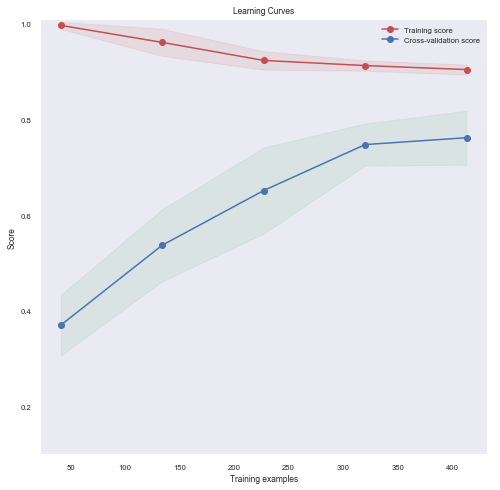

In [46]:
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)


steps = {"preprocessor" : preprocessor}
im_pipe_pre_process = dma.add_to_pipeline(**steps)
estimator = CV_grid_model.best_estimator_.get_params()['classifier']
title = r"Learning Curves"
dp.plot_learning_curve(estimator, title, im_pipe_pre_process.fit_transform(X_train), y_train, 
                       (0.1, 1.01), cv=cv, n_jobs=-1)

__Training data evaluation__

In [47]:
y_pred = dme.evaluate_model(CV_grid_model, X_train, y_train)
y_pred

Accuracy score : 0.9110251450676983
classification_report :
               precision    recall  f1-score   support

  MildClass1     0.9811    0.9905    0.9858       105
  MildClass2     1.0000    0.8495    0.9186        93
    Moderate     0.9263    0.7719    0.8421       114
        None     0.8177    0.9822    0.8925       169
      Severe     1.0000    0.9444    0.9714        36

   micro avg     0.9110    0.9110    0.9110       517
   macro avg     0.9450    0.9077    0.9221       517
weighted avg     0.9203    0.9110    0.9105       517



array(['None', 'None', 'Moderate', 'None', 'MildClass1', 'MildClass2',
       'Moderate', 'Moderate', 'MildClass2', 'MildClass2', 'None', 'None',
       'MildClass1', 'None', 'None', 'Moderate', 'None', 'Severe',
       'Moderate', 'None', 'None', 'Moderate', 'MildClass1', 'None',
       'MildClass2', 'None', 'MildClass1', 'MildClass2', 'None',
       'MildClass2', 'Moderate', 'MildClass2', 'None', 'MildClass2',
       'None', 'MildClass1', 'None', 'MildClass1', 'MildClass1', 'Severe',
       'Moderate', 'MildClass2', 'Moderate', 'None', 'None', 'MildClass2',
       'Moderate', 'MildClass2', 'MildClass2', 'Moderate', 'None',
       'MildClass1', 'Severe', 'None', 'MildClass1', 'Moderate',
       'MildClass1', 'MildClass1', 'MildClass1', 'MildClass1', 'None',
       'Moderate', 'Moderate', 'MildClass1', 'MildClass1', 'Moderate',
       'None', 'None', 'Moderate', 'None', 'None', 'MildClass2',
       'MildClass2', 'Severe', 'None', 'None', 'None', 'None',
       'MildClass2', 'MildClass1

__Get most important features__

In [48]:
#Alter train dataset
X_train_rf = X_train.copy()

num_col_split = X_train_rf.select_dtypes(include='float').columns
cat_col_split = X_train_rf.select_dtypes(include='category').columns

for column in X_train_rf[num_col_split].columns:
    X_train_rf[column].fillna(X_train_rf[column].mean(), inplace=True)

for column in X_train_rf[cat_col_split].columns:
    X_train_rf[column].fillna(X_train_rf[column].mode()[0], inplace=True)
    

X_train_rf_cat = pd.get_dummies(X_train_rf[other_cat_col])

#Merge with num variables
X_train_rf_1 = pd.concat([X_train_rf[num_col], X_train_rf_cat], axis=1)

X_train_rf_1.shape
X_train_rf_1.head()

(517, 94)

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,Stdepression,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,thalsev,thalpul,ECGspecsCalci_0.0,ECGspecsCalci_1.0,rcadistance_1.0,rcadistance_2.0,ECGspecsDigitalis_0.0,ECGspecsDigitalis_1.0,rcaproximation_1.0,rcaproximation_2.0,restwallmotion_0.0,restwallmotion_1.0,...,ExInducedAngina_1.0,FastingBS_0.0,FastingBS_1.0,ECGspecsBetaBlocker_0.0,ECGspecsBetaBlocker_1.0,ramus_1.0,ramus_2.0,Location_Cleveland,Location_Hungarian,Location_Switzerland,Location_Va,reliefbyrest_0.0,reliefbyrest_1.0,gender_0,gender_1,painexertion_0.0,painexertion_1.0,xhypo_0.0,xhypo_1.0,FamHistory_0.0,FamHistory_1.0,laddistance_1.0,laddistance_2.0,ladproximation_1.0,ladproximation_2.0,obtuseMarginal1_1.0,obtuseMarginal1_2.0,restingECGRes_0.0,restingECGRes_1.0,restingECGRes_2.0
25,59.0,130.000000,318.0,19.0,19.0,7.000000,6.0,5.000000,120.00000,50.000000,160.000000,100.000000,80.000000,1.000000,13.0,12.0,1.0,1.0,0.0,0.0,1,0,1,0,1,0,1,0,1,0,...,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0
492,54.0,132.000000,288.0,0.0,0.0,9.000000,0.0,10.000000,159.00000,89.000000,190.000000,70.000000,80.000000,0.000000,14.0,140.0,1.0,1.0,1.0,0.0,0,1,1,0,1,0,1,0,1,0,...,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
330,54.0,132.170478,0.0,20.0,40.0,8.757676,6.0,16.421951,137.29668,75.149378,171.720251,87.770355,83.538462,0.886013,14.0,55.0,1.0,1.0,1.0,0.0,1,0,1,0,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0
539,45.0,115.000000,260.0,10.0,24.0,11.000000,0.0,12.000000,185.00000,66.000000,174.000000,75.000000,80.000000,0.000000,14.0,70.0,0.0,1.0,1.0,0.0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
627,49.0,118.000000,149.0,25.0,40.0,8.800000,6.0,9.000000,126.00000,70.000000,120.000000,68.000000,82.000000,0.800000,14.0,230.0,3.0,1.0,1.0,0.0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1


In [49]:
#Alter test dataset
X_test_rf = X_test.copy()

for column in X_test_rf[num_col_split].columns:
    X_test_rf[column].fillna(X_test_rf[column].mean(), inplace=True)

for column in X_test_rf[cat_col_split].columns:
    X_test_rf[column].fillna(X_test_rf[column].mode()[0], inplace=True)
    

X_test_rf_cat = pd.get_dummies(X_test_rf[other_cat_col])

#Merge with num variables
X_test_rf_1 = pd.concat([X_test_rf[num_col], X_test_rf_cat], axis=1)

X_test_rf_1.shape
X_test_rf_1.head()

(130, 94)

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,Stdepression,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,thalsev,thalpul,ECGspecsCalci_0.0,ECGspecsCalci_1.0,rcadistance_1.0,rcadistance_2.0,ECGspecsDigitalis_0.0,ECGspecsDigitalis_1.0,rcaproximation_1.0,rcaproximation_2.0,restwallmotion_0.0,restwallmotion_1.0,...,ExInducedAngina_1.0,FastingBS_0.0,FastingBS_1.0,ECGspecsBetaBlocker_0.0,ECGspecsBetaBlocker_1.0,ramus_1.0,ramus_2.0,Location_Cleveland,Location_Hungarian,Location_Switzerland,Location_Va,reliefbyrest_0.0,reliefbyrest_1.0,gender_0,gender_1,painexertion_0.0,painexertion_1.0,xhypo_0.0,xhypo_1.0,FamHistory_0.0,FamHistory_1.0,laddistance_1.0,laddistance_2.0,ladproximation_1.0,ladproximation_2.0,obtuseMarginal1_1.0,obtuseMarginal1_2.0,restingECGRes_0.0,restingECGRes_1.0,restingECGRes_2.0
6,42.0,120.0,295.0,40.0,20.0,10.5,6.0,11.000000,162.0,77.0,155.0,68.0,85.0,0.0,14.0,50.0,0.0,1.0,1.0,0.03252,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0
232,54.0,120.0,230.0,19.0,19.0,6.0,6.0,4.000000,140.0,74.0,140.0,80.0,80.0,0.0,15.0,15.0,1.0,1.0,1.0,0.03252,1,0,1,0,1,0,1,0,1,0,...,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0
295,62.0,140.0,394.0,0.0,0.0,6.4,6.3,9.000000,157.0,65.0,170.0,78.0,90.0,1.2,14.0,120.0,0.0,1.0,1.0,0.00000,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
311,64.0,110.0,0.0,19.0,19.0,4.0,5.0,13.038136,114.0,80.0,130.0,75.0,90.0,1.3,11.0,15.0,1.0,1.0,1.0,0.00000,0,1,1,0,1,0,1,0,1,0,...,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0
604,57.0,110.0,197.0,30.0,40.0,7.0,6.0,8.000000,100.0,77.0,150.0,100.0,70.0,0.0,18.0,17.0,1.0,1.0,1.0,0.00000,1,0,1,0,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1


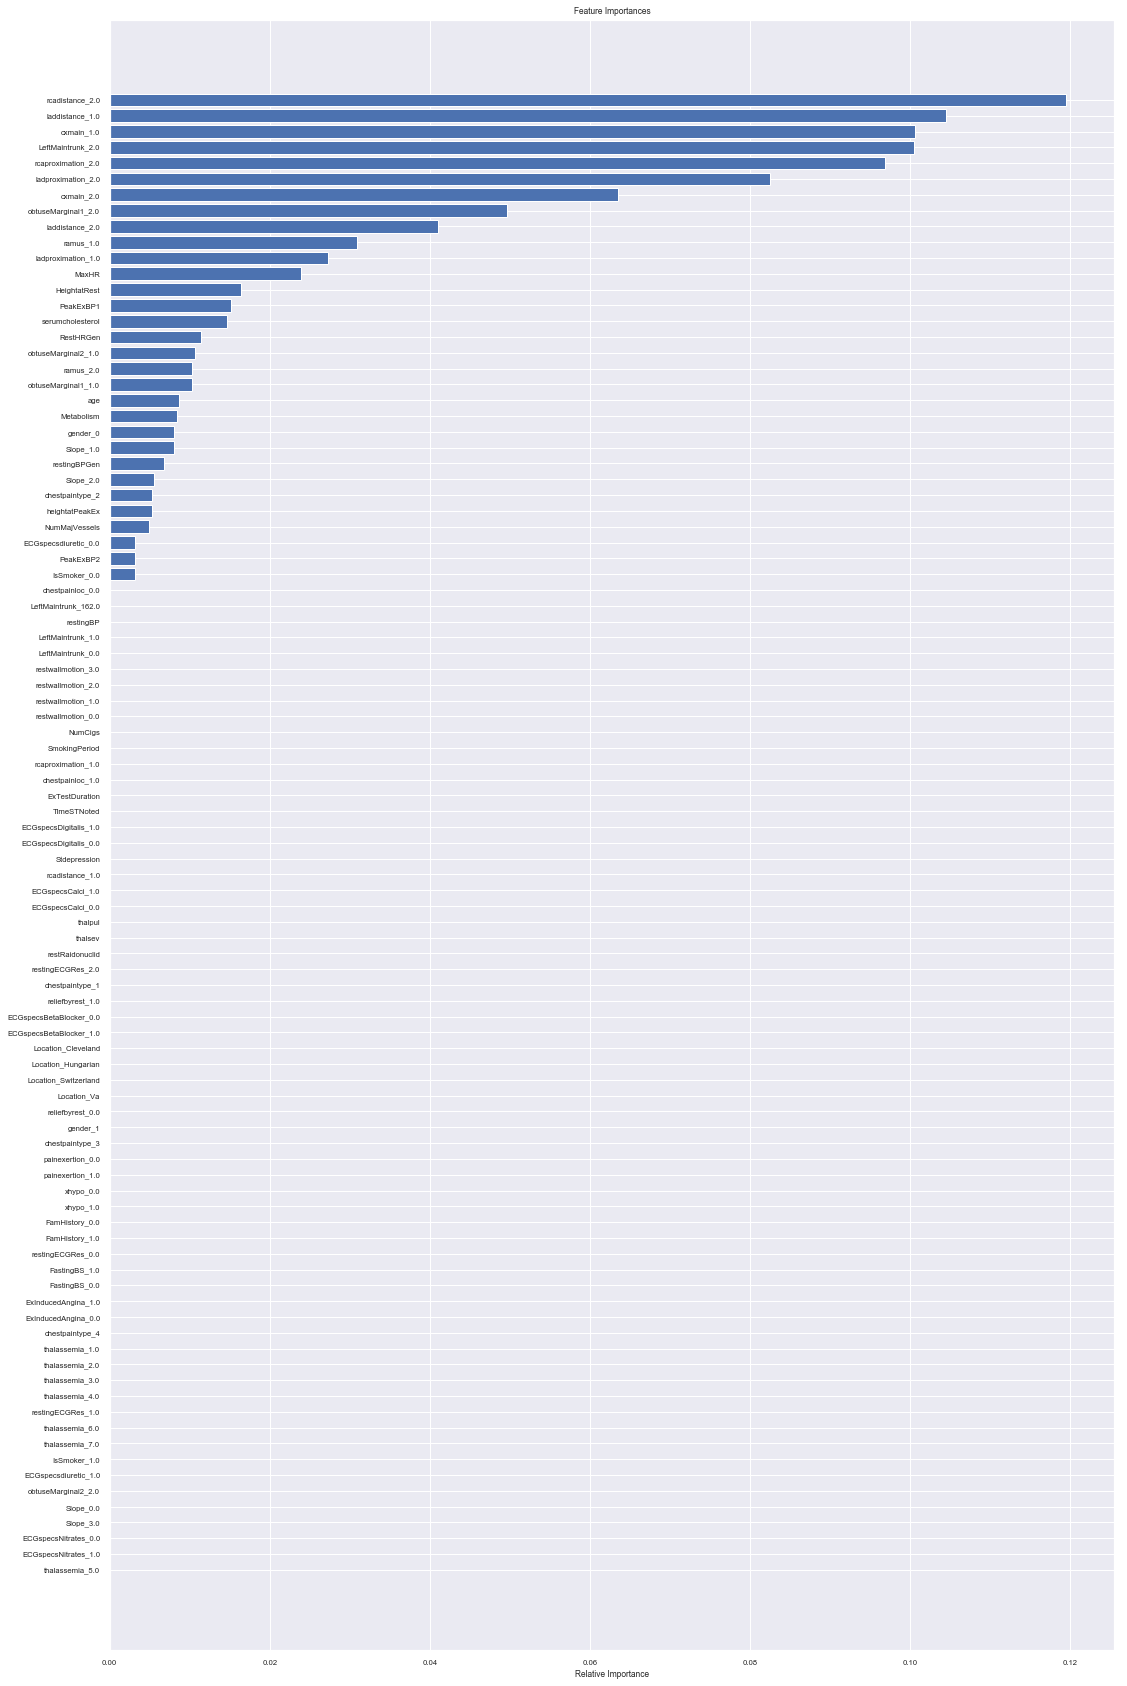

In [50]:
extm = CV_grid_model.best_estimator_.get_params()['classifier']
extm.fit(X_train_rf_1, y_train)
y_test_pred = extm.predict(X_test_rf_1)

features = X_train_rf_1.columns
importances = extm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (18,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();

__Plot the decision tree__

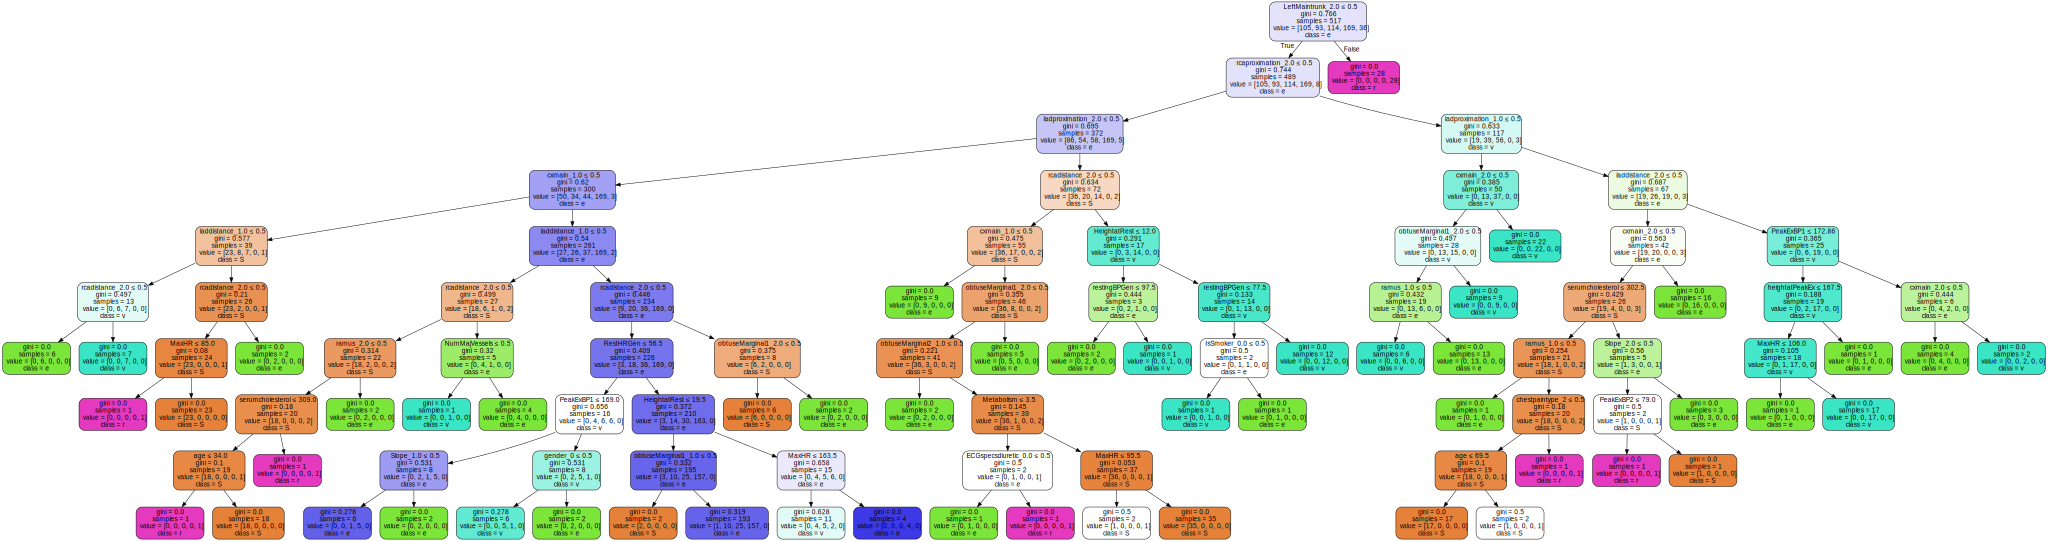

In [51]:
estm = CV_grid_model.best_estimator_.get_params()['classifier']
dp.plot_tree(X_train_rf_1, target='Severity',model=estm)

## Evaluate the model

__Evaluate Test data__

In [52]:
y_test_pred = dme.evaluate_model(CV_grid_model, X_test, y_test)
y_test_pred

Accuracy score : 0.1
classification_report :
               precision    recall  f1-score   support

  MildClass1     0.5000    0.0400    0.0741        25
  MildClass2     0.3333    0.0455    0.0800        22
    Moderate     0.2308    0.1200    0.1579        25
        None     0.0000    0.0000    0.0000        50
      Severe     0.0714    1.0000    0.1333         8

   micro avg     0.1000    0.1000    0.1000       130
   macro avg     0.2271    0.2411    0.0891       130
weighted avg     0.2013    0.1000    0.0664       130



array(['Severe', 'MildClass2', 'Severe', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'Moderate', 'Moderate', 'Severe',
       'Severe', 'Severe', 'Severe', 'Severe', 'MildClass1', 'Severe',
       'Severe', 'Moderate', 'Severe', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe', 'Moderate', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'Severe', 'Severe', 'MildClass2',
       'Severe', 'Severe', 'Severe', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'Moderate', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'Severe', 'Severe', 'Moderate',
       'Severe', 'MildClass1', 'Severe', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'MildClass2', 'Moderate', 'Severe',
       'Moderate', 'Severe', 'Severe', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe',

__Confusion matrix__

[[ 3 21  0  0  1]
 [ 0  8  0  0  0]
 [ 4 45  0  0  1]
 [ 4 20  0  1  0]
 [ 2 18  0  1  1]]


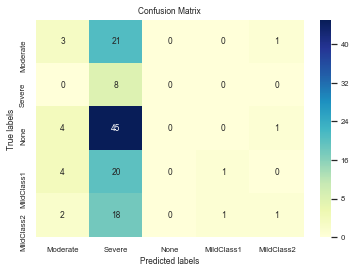

In [53]:
dp.plot_confusion_matrix(y_test,y_test_pred)

In [54]:
pd.DataFrame(y_test_pred)[0].value_counts()

Severe        112
Moderate       13
MildClass2      3
MildClass1      2
Name: 0, dtype: int64

## Run the model on actual test data

In [55]:
#Load test data
heartDiseaseData_test = di.data_importer_csv("/Users/samyam/Documents/Samya/GIT/insofe/Template/Test.csv", ["NA", "","-9"])


The number of Rows in the Data set  = 223
The number of Columns in the data set = 54


In [56]:
di.data_description(heartDiseaseData_test)

The columns in the data set are : 
 ['id', 'age', 'gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'restingBP', 'serumcholesterol', 'IsSmoker', 'NumCigs', 'SmokingPeriod', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'ExInducedAngina', 'xhypo', 'Stdepression', 'Slope', 'HeightatRest', 'heightatPeakEx', 'NumMajVessels', 'restRaidonuclid', 'restwallmotion', 'exerRadinalid', 'ExerWallmotion', 'thalassemia', 'thalsev', 'thalpul', 'earlobe', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance', 'nameOfPatient', 'Location']
The data types of the columns are :

 id                       int64
age                      int64
gender                   int64
chestpainloc          

In [57]:
di.get_data_sample(heartDiseaseData_test)

,id,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,exerRadinalid,ExerWallmotion,thalassemia,thalsev,thalpul,earlobe,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,nameOfPatient,Location
16,2144,53,1,1.0,1.0,1.0,4,140.0,243.0,NaN,19.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,6.0,9.0,155.0,95.0,190.0,90.0,80.0,0.0,0.0,0.0,2.0,10.0,10.0,1.0,NaN,0.0,NaN,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,name,Hungarian
71,4115,62,0,1.0,1.0,1.0,3,130.0,263.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,14.0,12.0,8.0,97.0,56.0,152.0,65.0,75.0,0.0,0.0,1.2,2.0,14.0,125.0,1.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,1.0,1.0,name,Cleveland
57,4220,59,1,1.0,1.0,NaN,4,138.0,271.0,NaN,30.0,31.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,13.0,182.0,76.0,194.0,26.0,90.0,0.0,0.0,0.0,1.0,14.0,50.0,0.0,1.0,0.0,1.0,NaN,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,name,Cleveland
174,2217,30,0,0.0,0.0,0.0,1,170.0,237.0,1.0,19.0,19.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,9.0,170.0,125.0,140.0,80.0,80.0,0.0,0.0,0.0,NaN,11.0,9.0,1.0,1.0,NaN,1.0,0.0,6.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,name,Hungarian
168,5036,52,1,1.0,1.0,1.0,4,95.0,0.0,1.0,19.0,19.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,6.0,NaN,82.0,54.0,125.0,70.0,70.0,1.0,0.0,NaN,NaN,14.0,55.0,1.0,1.0,0.0,1.0,NaN,3.0,1.0,NaN,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,name,Switzerland
53,5058,53,1,1.0,1.0,1.0,4,120.0,0.0,1.0,19.0,19.0,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,8.0,6.0,100.0,120.0,63.0,155.0,85.0,85.0,0.0,0.0,0.0,2.0,14.0,55.0,1.0,NaN,0.0,1.0,0.0,7.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,name,Switzerland
98,2232,37,1,1.0,1.0,1.0,4,130.0,315.0,1.0,19.0,19.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,6.0,158.0,88.0,190.0,104.0,96.0,0.0,0.0,0.0,2.0,21.0,19.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,name,Hungarian
127,2001,40,1,1.0,0.0,0.0,2,140.0,289.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,6.0,7.0,172.0,86.0,200.0,110.0,86.0,0.0,0.0,0.0,2.0,26.0,20.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,name,Hungarian
121,2258,55,0,0.0,0.0,0.0,2,130.0,394.0,NaN,19.0,19.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,11.0,6.0,6.3,150.0,100.0,200.0,100.0,90.0,0.0,0.0,0.0,2.0,4.0,5.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,name,Hungarian
150,4127,56,0,1.0,1.0,NaN,4,200.0,288.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.1,5.1,3.0,133.0,68.0,200.0,80.0,90.0,1.0,0.0,4.0,3.0,14.0,210.0,2.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,NaN,1.0,2.0,name,Cleveland


In [58]:
di.get_null_count_per_attribute(heartDiseaseData_test)

,total_missing,perc_missing
restwallmotion,52,23.318386
ExerWallmotion,40,17.937220
IsSmoker,33,14.798206
FastingBS,28,12.556054
ramus,26,11.659193
obtuseMarginal2,26,11.659193
Metabolism,25,11.210762
FamHistory,24,10.762332
Slope,22,9.865471
ECGspecsdiuretic,20,8.968610


In [59]:
heartDiseaseData_test_1 = heartDiseaseData_test.drop(
    ['id', 'ExerWallmotion', 'nameOfPatient', 'earlobe', 'exerRadinalid'], axis=1)

In [60]:
heartDiseaseData_test_1.shape

(223, 49)

In [61]:
heartDiseaseData_test_1.dtypes

age                      int64
gender                   int64
chestpainloc           float64
painexertion           float64
reliefbyrest           float64
chestpaintype            int64
restingBP              float64
serumcholesterol       float64
IsSmoker               float64
NumCigs                float64
SmokingPeriod          float64
FastingBS              float64
FamHistory             float64
restingECGRes          float64
ECGspecsDigitalis      float64
ECGspecsBetaBlocker    float64
ECGspecsNitrates       float64
ECGspecsCalci          float64
ECGspecsdiuretic       float64
ExTestDuration         float64
TimeSTNoted            float64
Metabolism             float64
MaxHR                  float64
RestHRGen              float64
PeakExBP1              float64
PeakExBP2              float64
restingBPGen           float64
ExInducedAngina        float64
xhypo                  float64
Stdepression           float64
Slope                  float64
HeightatRest           float64
heightat

In [62]:
#Datatype conversions
cat_col = ['gender','chestpainloc','painexertion','reliefbyrest','chestpaintype','IsSmoker','FastingBS',
           'FamHistory','restingECGRes','ECGspecsDigitalis','ECGspecsBetaBlocker','ECGspecsNitrates',
           'ECGspecsCalci','ECGspecsdiuretic','ExInducedAngina','xhypo','Slope','restwallmotion',
           'thalassemia','LeftMaintrunk','ladproximation','laddistance',
           'cxmain','ramus','obtuseMarginal1','obtuseMarginal2','rcaproximation','rcadistance','Location']
num_col = np.setdiff1d(heartDiseaseData_test_1.columns, cat_col).tolist()

cat_col
num_col


['gender',
 'chestpainloc',
 'painexertion',
 'reliefbyrest',
 'chestpaintype',
 'IsSmoker',
 'FastingBS',
 'FamHistory',
 'restingECGRes',
 'ECGspecsDigitalis',
 'ECGspecsBetaBlocker',
 'ECGspecsNitrates',
 'ECGspecsCalci',
 'ECGspecsdiuretic',
 'ExInducedAngina',
 'xhypo',
 'Slope',
 'restwallmotion',
 'thalassemia',
 'LeftMaintrunk',
 'ladproximation',
 'laddistance',
 'cxmain',
 'ramus',
 'obtuseMarginal1',
 'obtuseMarginal2',
 'rcaproximation',
 'rcadistance',
 'Location']

['ExTestDuration',
 'HeightatRest',
 'MaxHR',
 'Metabolism',
 'NumCigs',
 'NumMajVessels',
 'PeakExBP1',
 'PeakExBP2',
 'RestHRGen',
 'SmokingPeriod',
 'Stdepression',
 'TimeSTNoted',
 'age',
 'heightatPeakEx',
 'restRaidonuclid',
 'restingBP',
 'restingBPGen',
 'serumcholesterol',
 'thalpul',
 'thalsev']

In [63]:
heartDiseaseData_test_1[cat_col] = di.covert_var(heartDiseaseData_test_1[cat_col], "cat")
heartDiseaseData_test_1[num_col] = di.covert_var(heartDiseaseData_test_1[num_col], "num")    
    
heartDiseaseData_test_1.head()
heartDiseaseData_test_1.dtypes


,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,SmokingPeriod,FastingBS,FamHistory,restingECGRes,ECGspecsDigitalis,ECGspecsBetaBlocker,ECGspecsNitrates,ECGspecsCalci,ECGspecsdiuretic,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,PeakExBP1,PeakExBP2,restingBPGen,ExInducedAngina,xhypo,Stdepression,Slope,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,restwallmotion,thalassemia,thalsev,thalpul,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location
0,71.0,0,1.0,1.0,1.0,2,160.0,302.0,1.0,40.0,50.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.5,5.5,5.0,162.0,93.0,190.0,80.0,90.0,0.0,0.0,0.4,1.0,14.0,70.0,2.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,Cleveland
1,60.0,1,1.0,1.0,1.0,4,140.0,293.0,NaN,30.0,48.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,8.0,170.0,94.0,205.0,85.0,90.0,0.0,0.0,1.2,2.0,14.0,103.0,2.0,1.0,0.0,7.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,Cleveland
2,53.0,1,1.0,1.0,0.0,2,120.0,0.0,1.0,19.0,19.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,125.0,95.0,56.0,160.0,80.0,80.0,0.0,0.0,0.0,2.0,14.0,55.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,Switzerland
3,37.0,1,1.0,0.0,0.0,2,130.0,283.0,1.0,19.0,19.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,5.0,98.0,58.0,180.0,100.0,80.0,0.0,0.0,0.0,NaN,17.0,14.0,1.0,1.0,NaN,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,Hungarian
4,51.0,1,1.0,1.0,1.0,4,NaN,0.0,1.0,40.0,30.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,55.0,1.0,1.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,Va


age                     float64
gender                 category
chestpainloc           category
painexertion           category
reliefbyrest           category
chestpaintype          category
restingBP               float64
serumcholesterol        float64
IsSmoker               category
NumCigs                 float64
SmokingPeriod           float64
FastingBS              category
FamHistory             category
restingECGRes          category
ECGspecsDigitalis      category
ECGspecsBetaBlocker    category
ECGspecsNitrates       category
ECGspecsCalci          category
ECGspecsdiuretic       category
ExTestDuration          float64
TimeSTNoted             float64
Metabolism              float64
MaxHR                   float64
RestHRGen               float64
PeakExBP1               float64
PeakExBP2               float64
restingBPGen            float64
ExInducedAngina        category
xhypo                  category
Stdepression            float64
Slope                  category
Heightat

In [64]:
y_test_actual_pred = CV_grid_model.predict(heartDiseaseData_test_1)
y_test_op = pd.DataFrame(y_test_actual_pred).rename({0:'Severity'}, axis=1)
y_test_op.head(10)

,Severity
0,Severe
1,Severe
2,Severe
3,Severe
4,MildClass2
5,MildClass2
6,MildClass2
7,Severe
8,MildClass2
9,Severe


In [65]:
y_test_op['Severity'].value_counts()
(y_test_op["Severity"].value_counts()/y_test_op.shape[0])*100

Severe        192
MildClass2     16
Moderate       12
MildClass1      3
Name: Severity, dtype: int64

Severe        86.098655
MildClass2     7.174888
Moderate       5.381166
MildClass1     1.345291
Name: Severity, dtype: float64

In [66]:
y_test_op_1 = pd.concat([heartDiseaseData_test[['id']], y_test_op], axis=1)
y_test_op_1.head()

,id,Severity
0,4043,Severe
1,4159,Severe
2,5065,Severe
3,2003,Severe
4,3027,MildClass2


In [67]:
y_test_op_1[['id', 'Severity']].to_csv(
    path_or_buf="/Users/samyam/Documents/Samya/GIT/insofe/Template/submission.csv", index=False)


## Question:-

### Q1
Exploratory Data Analysis done in above steps

### Q2
1. Gender - male seams to be more prone to Diseased condition
2. chestpainloc - substernal leads to Severe condition
3. LeftMaintrunk - when two leads to Severe condition
4. HeightatRest - has a higher value for Severe condition
5. SmokingPeriod - Higher the smoking period, more chances of severe


### Q3
Based on the learning curve, it looks to be high variance problem.

### Q4
As this is a high variance problem, Random forest is a good fit.
Based on the data at hand, that is a medical data, tree based models is more preferred as its more explainable.

### Q5
1. ladproximation
2. rcaproximation
3. cxmain
4. LeftMaintrunk
5. laddistance
6. serumcholesterol
7. MaxHR

## Changes

## Backup